In [46]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py

In [47]:
pwd

'C:\\Users\\Beck\\Desktop\\tensorflow'

In [48]:
d1= pd.read_csv("./ipc_subcount_a.csv", index_col=False)
d1=d1.fillna(0)

In [49]:
d1.tail(5)

date    A01  A21  A22   A23  A24   A41  A42   A43   A44  ...  \
1274  1999-11-30  107.0  8.0  5.0  43.0  5.0  16.0  5.0  15.0   8.0  ...   
1275  1999-12-07   96.0  8.0  5.0  40.0  6.0  12.0  6.0  12.0  10.0  ...   
1276  1999-12-14   72.0  4.0  4.0  28.0  1.0  12.0  4.0   7.0   4.0  ...   
1277  1999-12-21   74.0  7.0  2.0  37.0  1.0   5.0  1.0   7.0   8.0  ...   
1278  1999-12-28   58.0  4.0  3.0  28.0  3.0  12.0  7.0  12.0  10.0  ...   

       G21  G99    H01    H02    H03    H04   H05  H99    Y02  Y04  
1274  13.0  0.0  507.0  102.0  106.0  374.0  94.0  0.0  214.0  5.0  
1275   6.0  0.0  484.0   98.0   89.0  296.0  84.0  0.0  191.0  2.0  
1276   9.0  0.0  368.0   61.0   56.0  281.0  70.0  0.0  123.0  1.0  
1277   4.0  0.0  354.0   80.0   75.0  336.0  60.0  0.0  145.0  4.0  
1278   8.0  0.0  390.0   84.0   65.0  282.0  64.0  0.0  156.0  1.0  

[5 rows x 136 columns]

In [50]:
d2=pd.read_csv("./ipc_subcount_b.csv", index_col=False)
d2=d2.fillna(0)
d2.tail(5)

date  A01  A21  A22  A23   A24  A41  A42   A43   A44  ...   G21  \
1143  2021-11-30  112  3.0  1.0   43  10.0   15  4.0  15.0  11.0  ...  16.0   
1144  2021-12-07  118  1.0  3.0   33  15.0   15  7.0   8.0  10.0  ...  15.0   
1145  2021-12-14  113  1.0  4.0   38  20.0   10  4.0  10.0   7.0  ...  22.0   
1146  2021-12-21   72  3.0  3.0   29  11.0   10  5.0  10.0   2.0  ...   8.0   
1147  2021-12-28  121  7.0  1.0   57  17.0   23  8.0  14.0   7.0  ...  13.0   

      G99  H01  H02  H03   H04  H05  H99  Y02   Y04  
1143  0.0  860  240  133  1347  154  0.0  499  21.0  
1144  0.0  830  231  136  1325  162  0.0  551  26.0  
1145  0.0  665  217  110  1058  135  0.0  420  17.0  
1146  0.0  535  196  101   942  110  0.0  368  17.0  
1147  0.0  822  240  128  1314  177  0.0  531  29.0  

[5 rows x 136 columns]

In [51]:
d=pd.concat([d1,d2])

In [52]:
d.head(50)


date   A01   A21  A22   A23   A24  A41  A42  A43  A44  ...   G21  \
0   1976-01-06  28.0   5.0  4.0  18.0   7.0  1.0  0.0  2.0  2.0  ...  14.0   
1   1976-01-13  32.0   4.0  3.0  15.0   3.0  1.0  0.0  5.0  4.0  ...  11.0   
2   1976-01-20  38.0   5.0  2.0  17.0   3.0  6.0  0.0  2.0  4.0  ...  11.0   
3   1976-01-25   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
4   1976-01-27  23.0   2.0  7.0  14.0   1.0  6.0  2.0  4.0  2.0  ...   6.0   
5   1976-02-03  25.0   2.0  0.0  13.0   4.0  5.0  1.0  2.0  4.0  ...  10.0   
6   1976-02-08   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
7   1976-02-10  30.0   4.0  4.0  16.0   3.0  5.0  0.0  3.0  1.0  ...  15.0   
8   1976-02-17  34.0   1.0  1.0  18.0   1.0  3.0  0.0  5.0  0.0  ...   7.0   
9   1976-02-24  33.0   1.0  3.0  17.0   6.0  2.0  0.0  2.0  3.0  ...  13.0   
10  1976-03-02  49.0   3.0  2.0  11.0   1.0  4.0  0.0  4.0  3.0  ...  14.0   
11  1976-03-09  35.0   1.0  5.0  16.0   3.0  4.0  0.0  3.0  3.0  ...  10.0   
12  1976-03-16  42.0   2.0  7.0  15.0  11.0  1.0  2.0  1.0  2.0  ...  12.0   
13  1976-03-23  30.0   3.0  5.0  16.0   3.0  5.0  2.0  6.0  6.0  ...  15.0   
14  1976-03-25   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
15  1976-03-30  34.0  10.0  1.0  14.0   2.0  4.0  3.0  2.0  1.0  ...   8.0   
16  1976-04-06  45.0   3.0  5.0  20.0   6.0  1.0  0.0  3.0  4.0  ...   7.0   
17  1976-04-13  45.0   5.0  3.0  29.0   5.0  4.0  0.0  3.0  3.0  ...   7.0   
18  1976-04-20  38.0   2.0  4.0  18.0   3.0  8.0  1.0  5.0  5.0  ...   7.0   
19  1976-04-27  40.0   3.0  2.0  17.0   4.0  2.0  1.0  7.0  5.0  ...  12.0   
20  1976-05-04  27.0   4.0  1.0  11.0   2.0  4.0  1.0  2.0  2.0  ...   7.0   
21  1976-05-11  38.0   2.0  6.0  22.0   5.0  3.0  2.0  1.0  6.0  ...   7.0   
22  1976-05-15   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
23  1976-05-18  39.0   1.0  1.0  31.0  10.0  4.0  1.0  2.0  7.0  ...   9.0   
24  1976-05-25  44.0   7.0  5.0  27.0   6.0  2.0  1.0  1.0  4.0  ...  12.0   
25  1976-05-26   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
26  1976-06-01  53.0   0.0  3.0  24.0   5.0  4.0  0.0  1.0  4.0  ...   8.0   
27  1976-06-08  40.0   3.0  0.0  31.0   2.0  2.0  0.0  4.0  3.0  ...   8.0   
28  1976-06-15  50.0   3.0  2.0   8.0   3.0  1.0  2.0  3.0  2.0  ...   9.0   
29  1976-06-22  35.0   1.0  7.0  16.0   7.0  5.0  0.0  3.0  7.0  ...  11.0   
30  1976-06-29  53.0   3.0  4.0  35.0   6.0  6.0  0.0  5.0  6.0  ...  13.0   
31  1976-07-06  41.0   2.0  2.0  25.0   7.0  2.0  0.0  3.0  5.0  ...   7.0   
32  1976-07-13  42.0   0.0  0.0  19.0   4.0  4.0  1.0  3.0  6.0  ...  10.0   
33  1976-07-20  31.0   3.0  1.0  15.0   3.0  3.0  1.0  1.0  4.0  ...   8.0   
34  1976-07-27  42.0   2.0  4.0  14.0   3.0  2.0  0.0  5.0  3.0  ...  10.0   
35  1976-08-03  32.0   1.0  1.0  23.0   3.0  1.0  1.0  6.0  1.0  ...   4.0   
36  1976-08-04   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
37  1976-08-10  30.0   4.0  1.0  15.0   2.0  0.0  0.0  6.0  5.0  ...   8.0   
38  1976-08-17  34.0   3.0  1.0  14.0   4.0  2.0  0.0  1.0  7.0  ...   6.0   
39  1976-08-24  38.0   3.0  3.0  19.0   3.0  5.0  1.0  4.0  7.0  ...  15.0   
40  1976-08-31  31.0   1.0  2.0  19.0   9.0  3.0  0.0  7.0  5.0  ...   5.0   
41  1976-09-07  34.0   5.0  0.0  10.0   8.0  0.0  3.0  2.0  2.0  ...   9.0   
42  1976-09-14  37.0   0.0  2.0   5.0   5.0  5.0  1.0  3.0  6.0  ...  13.0   
43  1976-09-21  35.0   1.0  4.0  31.0   4.0  5.0  0.0  2.0  4.0  ...  12.0   
44  1976-09-28  33.0   4.0  3.0  13.0   3.0  1.0  0.0  2.0  6.0  ...   6.0   
45  1976-10-05  22.0   2.0  2.0  14.0   3.0  3.0  2.0  3.0  7.0  ...  11.0   
46  1976-10-12  36.0   1.0  0.0  21.0   4.0  2.0  1.0  3.0  3.0  ...   5.0   
47  1976-10-19  30.0   3.0  2.0  14.0   3.0  1.0  1.0  2.0  4.0  ...   7.0   
48  1976-10-21   0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0   
49  1976-10-26  32.0   3.0  0.0  17.0   5.0  5.0  2.0  2.0  3.0  ...  13.0   

    G99    H01   H02   H03   H0

In [53]:
d.tail(5)

date    A01  A21  A22   A23   A24   A41  A42   A43   A44  ...  \
1143  2021-11-30  112.0  3.0  1.0  43.0  10.0  15.0  4.0  15.0  11.0  ...   
1144  2021-12-07  118.0  1.0  3.0  33.0  15.0  15.0  7.0   8.0  10.0  ...   
1145  2021-12-14  113.0  1.0  4.0  38.0  20.0  10.0  4.0  10.0   7.0  ...   
1146  2021-12-21   72.0  3.0  3.0  29.0  11.0  10.0  5.0  10.0   2.0  ...   
1147  2021-12-28  121.0  7.0  1.0  57.0  17.0  23.0  8.0  14.0   7.0  ...   

       G21  G99    H01    H02    H03     H04    H05  H99    Y02   Y04  
1143  16.0  0.0  860.0  240.0  133.0  1347.0  154.0  0.0  499.0  21.0  
1144  15.0  0.0  830.0  231.0  136.0  1325.0  162.0  0.0  551.0  26.0  
1145  22.0  0.0  665.0  217.0  110.0  1058.0  135.0  0.0  420.0  17.0  
1146   8.0  0.0  535.0  196.0  101.0   942.0  110.0  0.0  368.0  17.0  
1147  13.0  0.0  822.0  240.0  128.0  1314.0  177.0  0.0  531.0  29.0  

[5 rows x 136 columns]

In [54]:
sum1=d.sum(axis=1)
stop=sum1.index[(sum1<100)].tolist()
print(stop)
d=d.drop(stop, axis=0)
d=d.reset_index(drop=True)
d

[3, 6, 14, 22, 25, 36, 48, 58, 73, 80, 113, 127, 137, 145, 148, 175, 406, 560, 594, 598, 628, 655, 678, 685, 722, 736, 1228]


C:\Users\Beck\AppData\Local\Temp/ipykernel_4684/2038081442.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



date    A01  A21  A22   A23   A24   A41  A42   A43   A44  ...  \
0     1976-01-06   28.0  5.0  4.0  18.0   7.0   1.0  0.0   2.0   2.0  ...   
1     1976-01-13   32.0  4.0  3.0  15.0   3.0   1.0  0.0   5.0   4.0  ...   
2     1976-01-20   38.0  5.0  2.0  17.0   3.0   6.0  0.0   2.0   4.0  ...   
3     1976-01-27   23.0  2.0  7.0  14.0   1.0   6.0  2.0   4.0   2.0  ...   
4     1976-02-03   25.0  2.0  0.0  13.0   4.0   5.0  1.0   2.0   4.0  ...   
...          ...    ...  ...  ...   ...   ...   ...  ...   ...   ...  ...   
2369  2021-11-30  112.0  3.0  1.0  43.0  10.0  15.0  4.0  15.0  11.0  ...   
2370  2021-12-07  118.0  1.0  3.0  33.0  15.0  15.0  7.0   8.0  10.0  ...   
2371  2021-12-14  113.0  1.0  4.0  38.0  20.0  10.0  4.0  10.0   7.0  ...   
2372  2021-12-21   72.0  3.0  3.0  29.0  11.0  10.0  5.0  10.0   2.0  ...   
2373  2021-12-28  121.0  7.0  1.0  57.0  17.0  23.0  8.0  14.0   7.0  ...   

       G21  G99    H01    H02    H03     H04    H05  H99    Y02   Y04  
0     14.0  0.0  107.0   26.0   32.0    35.0   13.0  0.0   68.0   0.0  
1     11.0  0.0   92.0   33.0   26.0    25.0   20.0  0.0   54.0   0.0  
2     11.0  0.0   84.0   18.0   26.0    41.0   19.0  0.0   77.0   0.0  
3      6.0  0.0   92.0   24.0   28.0    39.0   26.0  0.0   56.0   0.0  
4     10.0  0.0  126.0   29.0   34.0    41.0   18.0  0.0   49.0   0.0  
...    ...  ...    ...    ...    ...     ...    ...  ...    ...   ...  
2369  16.0  0.0  860.0  240.0  133.0  1347.0  154.0  0.0  499.0  21.0  
2370  15.0  0.0  830.0  231.0  136.0  1325.0  162.0  0.0  551.0  26.0  
2371  22.0  0.0  665.0  217.0  110.0  1058.0  135.0  0.0  420.0  17.0  
2372   8.0  0.0  535.0  196.0  101.0   942.0  110.0  0.0  368.0  17.0  
2373  13.0  0.0  822.0  240.0  128.0  1314.0  177.0  0.0  531.0  29.0  

[2374 rows x 136 columns]

In [37]:
d.loc[d.sum(axis=1)<1000].index

C:\Users\Beck\AppData\Local\Temp/ipykernel_4684/3142819225.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Int64Index([177, 178, 179, 180, 181, 373, 374], dtype='int64')

In [55]:
d.drop(['B68','G12','C14','D02','D03','B09','H99', 'G99', 'F99', 'E99', 'D99', 'C99', 'B99', 'A99'], axis=1, inplace=True)

In [56]:
d

date    A01  A21  A22   A23   A24   A41  A42   A43   A44  ...  \
0     1976-01-06   28.0  5.0  4.0  18.0   7.0   1.0  0.0   2.0   2.0  ...   
1     1976-01-13   32.0  4.0  3.0  15.0   3.0   1.0  0.0   5.0   4.0  ...   
2     1976-01-20   38.0  5.0  2.0  17.0   3.0   6.0  0.0   2.0   4.0  ...   
3     1976-01-27   23.0  2.0  7.0  14.0   1.0   6.0  2.0   4.0   2.0  ...   
4     1976-02-03   25.0  2.0  0.0  13.0   4.0   5.0  1.0   2.0   4.0  ...   
...          ...    ...  ...  ...   ...   ...   ...  ...   ...   ...  ...   
2369  2021-11-30  112.0  3.0  1.0  43.0  10.0  15.0  4.0  15.0  11.0  ...   
2370  2021-12-07  118.0  1.0  3.0  33.0  15.0  15.0  7.0   8.0  10.0  ...   
2371  2021-12-14  113.0  1.0  4.0  38.0  20.0  10.0  4.0  10.0   7.0  ...   
2372  2021-12-21   72.0  3.0  3.0  29.0  11.0  10.0  5.0  10.0   2.0  ...   
2373  2021-12-28  121.0  7.0  1.0  57.0  17.0  23.0  8.0  14.0   7.0  ...   

        G11    G16   G21    H01    H02    H03     H04    H05    Y02   Y04  
0      19.0    0.0  14.0  107.0   26.0   32.0    35.0   13.0   68.0   0.0  
1      22.0    0.0  11.0   92.0   33.0   26.0    25.0   20.0   54.0   0.0  
2      12.0    1.0  11.0   84.0   18.0   26.0    41.0   19.0   77.0   0.0  
3      18.0    0.0   6.0   92.0   24.0   28.0    39.0   26.0   56.0   0.0  
4      24.0    0.0  10.0  126.0   29.0   34.0    41.0   18.0   49.0   0.0  
...     ...    ...   ...    ...    ...    ...     ...    ...    ...   ...  
2369   98.0   91.0  16.0  860.0  240.0  133.0  1347.0  154.0  499.0  21.0  
2370  104.0  121.0  15.0  830.0  231.0  136.0  1325.0  162.0  551.0  26.0  
2371  110.0  100.0  22.0  665.0  217.0  110.0  1058.0  135.0  420.0  17.0  
2372   86.0   65.0   8.0  535.0  196.0  101.0   942.0  110.0  368.0  17.0  
2373  127.0  102.0  13.0  822.0  240.0  128.0  1314.0  177.0  531.0  29.0  

[2374 rows x 122 columns]

In [57]:
d['B01']

0        75.0
1        62.0
2        78.0
3        50.0
4        29.0
        ...  
2369    175.0
2370    152.0
2371    130.0
2372    124.0
2373    169.0
Name: B01, Length: 2374, dtype: float64

In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Columns: 122 entries, date to Y04
dtypes: float64(121), object(1)
memory usage: 2.2+ MB


In [59]:
d.columns[1:]

Index(['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A42', 'A43', 'A44', 'A45',
       ...
       'G11', 'G16', 'G21', 'H01', 'H02', 'H03', 'H04', 'H05', 'Y02', 'Y04'],
      dtype='object', length=121)

In [116]:
dsum=d.sum(axis=1)
for i, num in enumerate(dsum):
        d.iloc[i,1:]=d.iloc[i,1:]/num
d['B01']

date       A01       A21       A22       A23       A24       A41  \
0     1976-01-06  0.014381  0.002568  0.002054  0.009245  0.003595  0.000514   
1     1976-01-13  0.017788  0.002223  0.001668  0.008338  0.001668  0.000556   
2     1976-01-20  0.019648  0.002585  0.001034  0.008790  0.001551  0.003102   
3     1976-01-27  0.012439  0.001082  0.003786  0.007572  0.000541  0.003245   
4     1976-02-03  0.013669  0.001093  0.000000  0.007108  0.002187  0.002734   
...          ...       ...       ...       ...       ...       ...       ...   
2369  2021-11-30  0.010010  0.000268  0.000089  0.003843  0.000894  0.001341   
2370  2021-12-07  0.010246  0.000087  0.000260  0.002865  0.001302  0.001302   
2371  2021-12-14  0.012157  0.000108  0.000430  0.004088  0.002152  0.001076   
2372  2021-12-21  0.009018  0.000376  0.000376  0.003632  0.001378  0.001253   
2373  2021-12-28  0.010582  0.000612  0.000087  0.004985  0.001487  0.002012   

           A42       A43       A44  ...       G21  G99       H01       H02  \
0     0.000000  0.001027  0.001027  ...  0.007191  0.0  0.054956  0.013354   
1     0.000000  0.002779  0.002223  ...  0.006115  0.0  0.051140  0.018344   
2     0.000000  0.001034  0.002068  ...  0.005688  0.0  0.043433  0.009307   
3     0.001082  0.002163  0.001082  ...  0.003245  0.0  0.049757  0.012980   
4     0.000547  0.001093  0.002187  ...  0.005467  0.0  0.068890  0.015856   
...        ...       ...       ...  ...       ...  ...       ...       ...   
2369  0.000357  0.001341  0.000983  ...  0.001430  0.0  0.076861  0.021450   
2370  0.000608  0.000695  0.000868  ...  0.001302  0.0  0.072067  0.020057   
2371  0.000430  0.001076  0.000753  ...  0.002367  0.0  0.071544  0.023346   
2372  0.000626  0.001253  0.000251  ...  0.001002  0.0  0.067009  0.024549   
2373  0.000700  0.001224  0.000612  ...  0.001137  0.0  0.071891  0.020990   

           H03       H04       H05  H99       Y02       Y04  
0     0.016436  0.017976  0.006677  0.0  0.034926  0.000000  
1     0.014452  0.013897  0.011117  0.0  0.030017  0.000000  
2     0.013444  0.021200  0.009824  0.0  0.039814  0.000000  
3     0.015143  0.021092  0.014062  0.0  0.030287  0.000000  
4     0.018589  0.022417  0.009841  0.0  0.026791  0.000000  
...        ...       ...       ...  ...       ...       ...  
2369  0.011887  0.120386  0.013764  0.0  0.044597  0.001877  
2370  0.011809  0.115047  0.014066  0.0  0.047842  0.002258  
2371  0.011834  0.113825  0.014524  0.0  0.045186  0.001829  
2372  0.012650  0.117986  0.013778  0.0  0.046092  0.002129  
2373  0.011195  0.114920  0.015480  0.0  0.046440  0.002536  

[2374 rows x 136 columns]

In [60]:
date=d.iloc[:,0]
for i, name in enumerate(d.columns[1:]):
    globals()['{}'.format(name)]=pd.concat([date, d.iloc[:,i+1]], axis=1)
    globals()[name].columns=['ds','y']



In [61]:
A01.iloc[2000:2010]

ds      y
2000  2014-11-04   81.0
2001  2014-11-11  123.0
2002  2014-11-18   97.0
2003  2014-11-25   93.0
2004  2014-12-02   93.0
2005  2014-12-09   89.0
2006  2014-12-16   77.0
2007  2014-12-23   61.0
2008  2014-12-30  118.0
2009  2015-01-06  107.0

In [62]:
import plotly.io as pio 
import plotly.express as px #빠르게 사용
fig=px.line(A01, x='ds', y='y', title='A01')
fig.show()

In [65]:
col=d.columns[1:].tolist()

'''
p=['A99', 'B99', 'C99', 'D99', 'E99', 'F99','G99', 'H99','B68','G12','C14','D02','D03','B09']
for h in p:
    col.remove(h)
print(col[15])
'''
len(col)

121

In [66]:

result=[]
fr_result=[]
'''
m=Prophet()
m.fit(A01)
forecast=m.predict(A01)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()
'''
for i in col:
        m=Prophet()
        m.fit(globals()[i])
        forecast=m.predict(globals()[i])
        result.append(forecast)
        future =  m.make_future_dataframe(periods=365)
        forecast=m.predict(future)
        fr_result.append(forecast)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


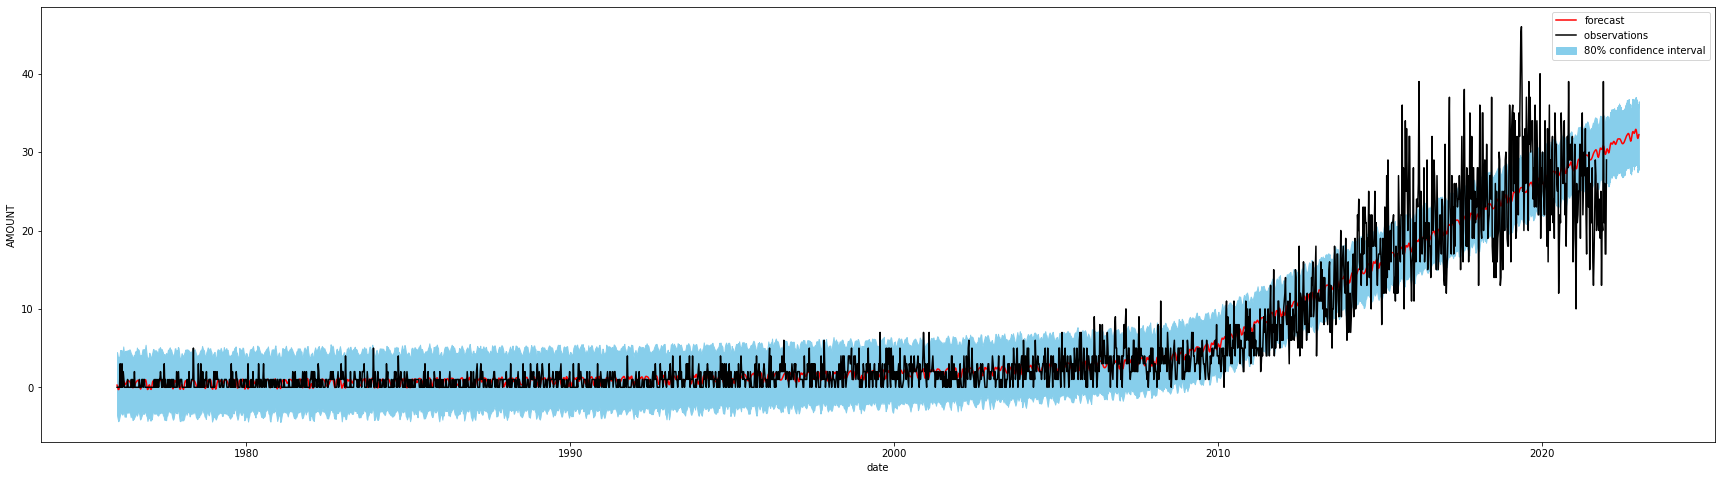

In [67]:
fig, ax = plt.subplots(figsize=(30,8))

plt.plot(pd.to_datetime(forecast['ds']),forecast['yhat'], label='forecast', color='red')
plt.plot(pd.to_datetime(Y04['ds']),Y04['y'], label='observations ', color='black')
plt.fill_between(pd.to_datetime(forecast['ds']), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('AMOUNT')
plt.show()
#검은 점은 실측치, 하늘색 선은 예측치, 연한 하늘색 영역은 신뢰 구간(디폴트는 80%)을 나타낸다.

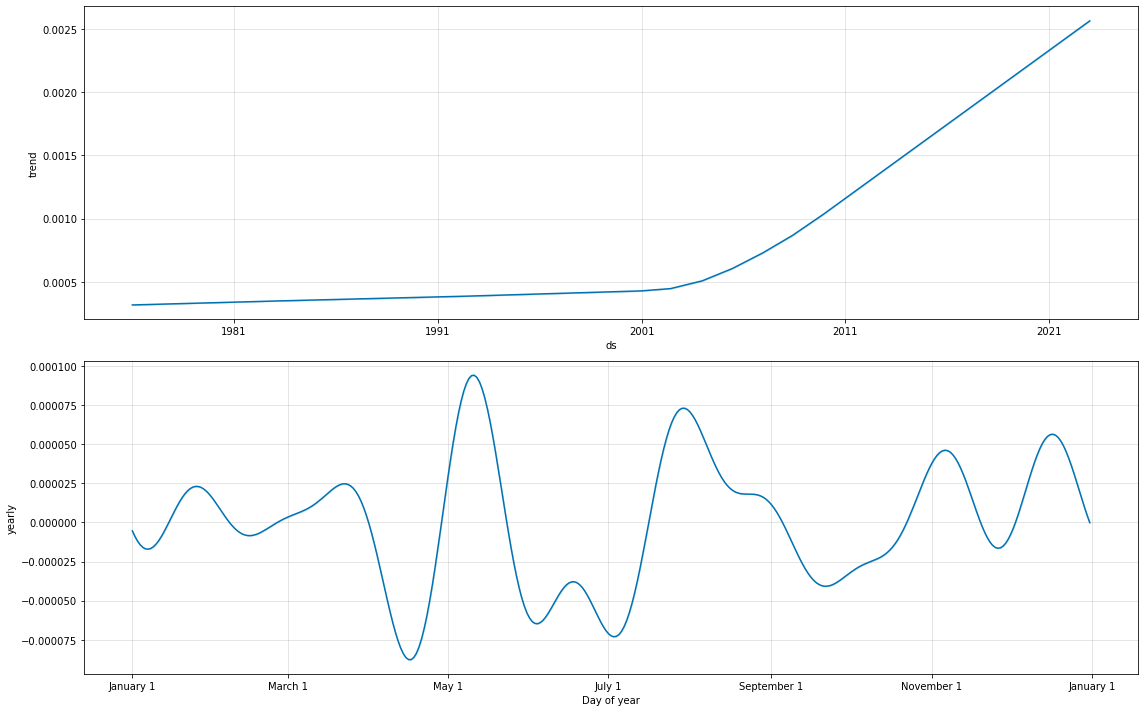

In [30]:
m.plot_components(forecast,figsize=(16,10))
plt.show()

In [68]:
def yr_updown(yr: int):
    updown=[]
    #y_x=[]
    d['date']=pd.to_datetime(d['date'], format="%Y-%m-%d")
    for i, k in enumerate(col):
        x=d[d['date'].dt.year==yr]
        x1=x.iloc[:][k].mean(axis=0)
        print(x1)
    
        nxt_yr=yr+1
        y=d[d['date'].dt.year==nxt_yr]
        y1=y.iloc[:][k].mean(axis=0)
        print(y1)

        diff=y1-x1
        #y_x.append(diff)
        print(round((diff/x1) * 100,2))
        updown.append(round((diff/x1) * 100,2))
    
    return updown

a=[]
yr=[2016,2017,2018,2019,2020]
for i in yr:
    a.append(yr_updown(i))
    
print(a[0])   # 2016~2017년도 모든 IPC들의 변화율

101.28846153846153
110.88461538461539
9.47
3.826923076923077
3.576923076923077
-6.53
3.076923076923077
3.730769230769231
21.25
33.76923076923077
35.40384615384615
4.84
6.423076923076923
7.903846153846154
23.05
14.25
15.596153846153847
9.45
5.211538461538462
6.153846153846154
18.08
11.115384615384615
12.711538461538462
14.36
9.403846153846153
8.942307692307692
-4.91
25.865384615384617
28.807692307692307
11.38
7.346153846153846
7.230769230769231
-1.57
87.67307692307692
94.42307692307692
7.7
699.4807692307693
751.2307692307693
7.4
10.576923076923077
11.442307692307692
8.18
83.51923076923077
93.6923076923077
12.18
147.84615384615384
159.53846153846155
7.91
6.75
5.769230769230769
-14.53
6.153846153846154
5.961538461538462
-3.13
3.6153846153846154
3.326923076923077
-7.98
44.61538461538461
51.15384615384615
14.66
5.403846153846154
5.5576923076923075
2.85
5.865384615384615
6.365384615384615
8.52
13.711538461538462
15.73076923076923
14.73
21.846153846153847
24.096153846153847
10.3
19.9038461538

18.634615384615383
22.11320754716981
18.67
24.75
26.641509433962263
7.64
4.288461538461538
4.962264150943396
15.71
1.6153846153846154
1.7169811320754718
6.29
242.8653846153846
250.45283018867926
3.12
138.3846153846154
149.22641509433961
7.83
119.01923076923077
127.66037735849056
7.26
34.69230769230769
34.075471698113205
-1.78
16.21153846153846
17.30188679245283
6.73
163.8653846153846
173.47169811320754
5.86
1.5192307692307692
1.5660377358490567
3.08
13.076923076923077
15.641509433962264
19.61
32.05769230769231
37.264150943396224
16.24
55.38461538461539
59.528301886792455
7.48
19.23076923076923
22.037735849056602
14.6
10.25
10.69811320754717
4.37
3.019230769230769
3.69811320754717
22.49
8.807692307692308
9.849056603773585
11.82
9.942307692307692
11.075471698113208
11.4
2.326923076923077
2.69811320754717
15.95
19.365384615384617
21.735849056603772
12.24
1.7884615384615385
1.6603773584905661
-7.16
7.75
10.075471698113208
30.01
10.903846153846153
10.867924528301886
-0.33
16.057692307692307

105.07692307692308
5.48
15.807692307692308
12.23076923076923
-22.63
936.3269230769231
844.4038461538462
-9.82
271.1730769230769
252.94230769230768
-6.72
173.78846153846155
141.8653846153846
-18.37
1486.6153846153845
1358.673076923077
-8.61
209.82692307692307
178.8653846153846
-14.76
629.3461538461538
552.5961538461538
-12.2
26.442307692307693
23.46153846153846
-11.27
[9.47, -6.53, 21.25, 4.84, 23.05, 9.45, 18.08, 14.36, -4.91, 11.38, -1.57, 7.7, 7.4, 8.18, 12.18, 7.91, -14.53, -3.13, -7.98, 14.66, 2.85, 8.52, 14.73, 10.3, 19.52, 12.71, 2.35, 14.98, 9.18, 3.14, 18.04, 8.21, 22.63, -7.1, 13.93, 48.13, -13.69, 0.0, 14.69, 1.55, 14.54, 18.37, 10.67, 10.77, 26.48, 6.89, 21.99, 2.67, -1.68, -15.67, 6.73, 14.14, 11.47, 3.72, -19.72, 10.0, 2.2, 3.65, 8.98, -3.45, -3.3, 5.34, 5.31, 25.23, 12.46, 10.37, 22.75, 5.52, -19.89, 4.18, 6.14, 7.5, 15.21, 11.43, 22.26, 3.75, 7.05, 6.58, 16.43, 1.9, 13.54, 2.19, 11.62, 22.39, 15.49, 21.5, 23.39, 28.27, 14.79, 13.71, 4.45, 10.19, 17.54, -0.1, 17.88, 32.86

In [70]:
pd_a=pd.DataFrame(a,columns=col, dtype=float)
pd_a

A01    A21    A22   A23    A24    A41    A42    A43    A44    A45  ...  \
0   9.47  -6.53  21.25  4.84  23.05   9.45  18.08  14.36  -4.91  11.38  ...   
1  -2.27   5.91 -19.59 -0.05  74.45  11.34  -2.19   4.54   3.44   4.41  ...   
2  13.19  17.04 -10.06  8.99  11.80  23.43  26.01  14.30  12.80   6.64  ...   
3   1.15 -11.96  31.86  7.71   5.17   0.13  -2.64  -0.10  -3.42  -1.79  ...   
4  -9.72   1.97 -18.92 -1.71   1.78  -7.26  -7.55  -2.92  -1.53  -4.33  ...   

     G11    G16    G21    H01    H02    H03    H04    H05    Y02    Y04  
0  -6.60  21.34   7.47   4.71  15.50  -1.94   6.46   7.31   8.12  14.27  
1 -13.06   7.46 -12.14  -5.97   1.10  -9.81  -2.50   3.48  -2.58  -1.31  
2   9.01  41.16  10.96  10.99  13.17  27.07  12.99   6.29  11.73  29.19  
3   4.20   7.05   6.59   2.14  -5.42   2.78   3.41  -2.82  -0.87 -11.97  
4  -9.29   5.48 -22.63  -9.82  -6.72 -18.37  -8.61 -14.76 -12.20 -11.27  

[5 rows x 121 columns]

In [71]:
avg=[]

for i in col:
    pd_a_avg=pd_a.iloc[:][i].mean(axis=0)
    print(round(pd_a_avg,2))
    avg.append(round(pd_a_avg, 2))


avg=pd.Series(avg, index=col)
avg

2.36
1.29
0.91
3.96
23.25
7.42
6.34
6.04
1.28
3.26
4.08
3.99
2.98
6.01
2.46
3.01
2.76
-0.21
6.47
1.07
5.84
3.77
8.06
3.7
13.47
2.12
-4.76
10.26
4.23
4.6
7.32
7.08
5.99
2.66
7.17
37.18
-3.55
-2.18
2.84
1.36
6.38
4.81
4.72
0.7
13.1
2.76
7.19
7.58
-4.61
-6.08
0.63
6.99
0.43
0.09
3.71
-0.26
-1.17
0.53
1.63
-3.28
-0.75
2.57
-8.36
6.07
4.37
0.99
4.07
-3.03
5.37
5.46
4.81
5.83
4.46
3.89
15.98
0.77
1.05
0.71
4.37
1.7
3.63
2.63
5.37
5.69
3.39
3.98
6.91
15.16
7.29
3.14
1.47
3.96
-0.27
-0.96
6.67
8.15
1.63
-2.31
5.89
-0.8
2.04
4.73
4.06
-4.15
-0.87
14.71
6.94
5.77
10.23
5.93
7.04
-3.15
16.5
-1.95
0.41
3.53
-0.05
2.35
-0.1
0.84
3.78


A01     2.36
A21     1.29
A22     0.91
A23     3.96
A24    23.25
       ...  
H03    -0.05
H04     2.35
H05    -0.10
Y02     0.84
Y04     3.78
Length: 121, dtype: float64

In [72]:
avg.to_csv('2016~2021_5년_평균등락률'+'.csv')

In [73]:
#5년간 평균등락률 가장 높은 top 10 ipc
top10=avg.sort_values(ascending=False)[:9]
top10_index=top10.index.tolist()
print(top10)
print(top10_index)

B33    37.18
A24    23.25
G16    16.50
D10    15.98
F05    15.16
G05    14.71
B22    13.47
B64    13.10
B25    10.26
dtype: float64
['B33', 'A24', 'G16', 'D10', 'F05', 'G05', 'B22', 'B64', 'B25']


In [74]:
top20 = avg.sort_values(ascending=False)[:19]
top20_index=top20.index.tolist()
print(top20)
print(top20_index)

B33    37.18
A24    23.25
G16    16.50
D10    15.98
F05    15.16
G05    14.71
B22    13.47
B64    13.10
B25    10.26
G08    10.23
F25     8.15
B08     8.06
B67     7.58
A41     7.42
B28     7.32
F15     7.29
B66     7.19
B32     7.17
B29     7.08
dtype: float64
['B33', 'A24', 'G16', 'D10', 'F05', 'G05', 'B22', 'B64', 'B25', 'G08', 'F25', 'B08', 'B67', 'A41', 'B28', 'F15', 'B66', 'B32', 'B29']


In [75]:
C14

NameError: name 'C14' is not defined

In [54]:
fr_result[col.index('C14')]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1976-01-06  0.560118   -0.393565    1.417130     0.560118     0.560118   
1    1976-01-13  0.560056   -0.551768    1.302135     0.560056     0.560056   
2    1976-01-20  0.559994   -0.550574    1.240297     0.559994     0.559994   
3    1976-01-27  0.559932   -0.468714    1.389910     0.559932     0.559932   
4    1976-02-03  0.559870   -0.342663    1.469053     0.559870     0.559870   
...         ...       ...         ...         ...          ...          ...   
2734 2022-12-24  0.497138   -0.409619    1.414431     0.495826     0.497841   
2735 2022-12-25  0.497175   -0.346277    1.486542     0.495857     0.497885   
2736 2022-12-26  0.497212   -0.372975    1.464814     0.495891     0.497927   
2737 2022-12-27  0.497250   -0.358448    1.395011     0.495924     0.497969   
2738 2022-12-28  0.497287   -0.355667    1.387726     0.495950     0.498010   

      additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0          -0.021737             -0.021737             -0.021737 -0.021737   
1          -0.142425             -0.142425             -0.142425 -0.142425   
2          -0.199030             -0.199030             -0.199030 -0.199030   
3          -0.126207             -0.126207             -0.126207 -0.126207   
4           0.010372              0.010372              0.010372  0.010372   
...              ...                   ...                   ...       ...   
2734        0.023539              0.023539              0.023539  0.023539   
2735        0.031363              0.031363              0.031363  0.031363   
2736        0.037719              0.037719              0.037719  0.037719   
2737        0.042369              0.042369              0.042369  0.042369   
2738        0.045114              0.045114              0.045114  0.045114   

      yearly_lower  yearly_upper  multiplicative_terms  \
0        -0.021737     -0.021737                   0.0   
1        -0.142425     -0.142425                   0.0   
2        -0.199030     -0.199030                   0.0   
3        -0.126207     -0.126207                   0.0   
4         0.010372      0.010372                   0.0   
...            ...           ...                   ...   
2734      0.023539      0.023539                   0.0   
2735      0.031363      0.031363                   0.0   
2736      0.037719      0.037719                   0.0   
2737      0.042369      0.042369                   0.0   
2738      0.045114      0.045114                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  0.538380  
1                            0.0                         0.0  0.417631  
2                            0.0                         0.0  0.360964  
3                            0.0                         0.0  0.433725  
4                            0.0                         0.0  0.570242  
...                          ...                         ...       ...  
2734                         0.0                         0.0  0.520677  
2735                         0.0                         0.0  0.528538  
2736                         0.0                         0.0  0.534931  
2737                         0.0                         0.0  0.539619  
2738                         0.0                         0.0  0.542401  

[2739 rows x 16 columns]

In [53]:
d.iloc[:,110:130]

F41   F42  F99    G01    G02    G03   G04    G05     G06   G07    G08  \
0      6.0   4.0  0.0   79.0   20.0   43.0   8.0    9.0    21.0   8.0    4.0   
1      4.0   2.0  0.0   80.0   17.0   38.0   7.0   12.0    22.0   4.0   10.0   
2      0.0   2.0  0.0   86.0   19.0   56.0   2.0   17.0    25.0   7.0    5.0   
3      3.0   6.0  0.0   87.0   16.0   43.0   8.0   11.0    21.0  12.0    8.0   
4      6.0   3.0  0.0  110.0   36.0   61.0   5.0   15.0    20.0   8.0    4.0   
...    ...   ...  ...    ...    ...    ...   ...    ...     ...   ...    ...   
2369  32.0  15.0  0.0  574.0  271.0  111.0  14.0  198.0  1455.0  89.0  116.0   
2370  23.0  10.0  0.0  612.0  280.0  117.0  19.0  200.0  1511.0  87.0   95.0   
2371  17.0   9.0  0.0  466.0  232.0  101.0   8.0  152.0  1318.0  72.0   67.0   
2372  20.0   8.0  0.0  391.0  193.0   81.0   6.0  111.0  1044.0  46.0   74.0   
2373  25.0  13.0  0.0  583.0  248.0  112.0  11.0  183.0  1534.0  96.0  131.0   

        G09   G10    G11  G12    G16   G21  G99    H01    H02  
0       4.0  11.0   19.0  0.0    0.0  14.0  0.0  107.0   26.0  
1       9.0   4.0   22.0  0.0    0.0  11.0  0.0   92.0   33.0  
2       4.0   9.0   12.0  1.0    1.0  11.0  0.0   84.0   18.0  
3      11.0   3.0   18.0  0.0    0.0   6.0  0.0   92.0   24.0  
4      13.0  11.0   24.0  0.0    0.0  10.0  0.0  126.0   29.0  
...     ...   ...    ...  ...    ...   ...  ...    ...    ...  
2369  158.0  86.0   98.0  0.0   91.0  16.0  0.0  860.0  240.0  
2370  163.0  80.0  104.0  1.0  121.0  15.0  0.0  830.0  231.0  
2371  117.0  79.0  110.0  0.0  100.0  22.0  0.0  665.0  217.0  
2372  116.0  73.0   86.0  0.0   65.0   8.0  0.0  535.0  196.0  
2373  169.0  82.0  127.0  0.0  102.0  13.0  0.0  822.0  240.0  

[2374 rows x 20 columns]

In [39]:
x=d[d['date'].dt.year==2021]
print(x.iloc[:]['G12'])
x1=x.iloc[:]['G12'].mean(axis=0)
x1

2322    1.0
2323    0.0
2324    0.0
2325    1.0
2326    1.0
2327    1.0
2328    1.0
2329    1.0
2330    0.0
2331    0.0
2332    0.0
2333    0.0
2334    0.0
2335    0.0
2336    0.0
2337    0.0
2338    0.0
2339    1.0
2340    0.0
2341    0.0
2342    0.0
2343    0.0
2344    1.0
2345    0.0
2346    0.0
2347    1.0
2348    0.0
2349    1.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
2354    0.0
2355    1.0
2356    0.0
2357    0.0
2358    0.0
2359    0.0
2360    0.0
2361    0.0
2362    0.0
2363    1.0
2364    1.0
2365    0.0
2366    0.0
2367    0.0
2368    0.0
2369    0.0
2370    1.0
2371    0.0
2372    0.0
2373    0.0
Name: G12, dtype: float64


0.2692307692307692

In [78]:
#top20 ipc들 중 2021~2022 평균치의 등락률 순위 매기기
updown=[]
y2022=[]
d['date']=pd.to_datetime(d['date'], format="%Y-%m-%d")
for i, k in enumerate(top20_index):
    print(k)
    x=d[d['date'].dt.year==2021]
    x1=x.iloc[:][k].mean(axis=0)
    print(x1)
    
    y=fr_result[col.index(k)][fr_result[col.index(k)]['ds'].dt.year==2022]
    y1=y['yhat'].mean(axis=0)
    print(y1)
    
    diff=y1-x1
    y2022.append(diff)
    print((diff/x1) * 100)
    updown.append((diff/x1) * 100)
    
updown=pd.Series(updown, index=top20_index)
updown=updown.sort_values(ascending=False)

B33
48.63461538461539
45.31641798366203
-6.822707190572347
A24
16.5
18.781925460059053
13.829851273085172
G16
105.07692307692308
107.17740258218988
1.9989922085262413
D10
11.192307692307692
12.280254993591644
9.720491351677925
F05
80.63461538461539
94.52948430358353
17.231890860633044
G05
188.3653846153846
223.78373424356147
18.803003375857035
B22
37.05769230769231
38.78669010451446
4.665692030864148
B64
87.5
103.79735717466517
18.62555105676019
B25
70.01923076923077
76.24414884992966
8.89029772579901
G08
118.28846153846153
147.2715048763764
24.50200379729432
F25
39.48076923076923
49.91276802802304
26.42298769884061
B08
19.653846153846153
22.381575214696817
13.87885627830083
B67
14.25
15.448238937761252
8.40869430007896
A41
19.903846153846153
22.739025400541724
14.244378823977746
B28
10.23076923076923
11.461518735060526
12.029882372772068
F15
17.326923076923077
20.532034152357006
18.497866362104812
B66
24.01923076923077
28.00694254108919
16.602162701091906
B32
77.21153846153847
91.9429

In [80]:
updown.to_csv('top20_ipc_2021~2022_평균치_등락률_순위'+'.csv')

In [ ]:
#C14, B68, G12 는 출원수가 현저히 적어서 제외해야

In [81]:
ex1=fr_result[0][fr_result[0]['ds'].dt.year==2022]
ex2=ex1['yhat'].sum()
print(ex2)


48131.20350504608


In [82]:
#22년도 ipc 각각 예측 출원수들의 합의 순위
#fr_result 에 127개의 각각의 ipc들의 2022년 1월~12까지 예측 출원수 값이 있음
#각각 ipc들의 1년치의 합을 구하여 내림차순
sum_2022=[]
for i in fr_result:
    y=i[i['ds'].dt.year==2022]
    y1=y['yhat'].sum()
    sum_2022.append(y1)
    
df_sum_2022=pd.Series(sum_2022, index=col, dtype=float)
print(df_sum_2022.sort_values(ascending=False))
df_sum_2022_index=df_sum_2022.sort_values(ascending=False).index
df_sum_2022_index

G06    629064.226560
H04    565076.867667
H01    355263.780589
A61    317089.555054
G01    253001.181593
           ...      
B43      1067.627515
D05      1047.294447
C13       747.390117
D07       691.170734
C06       593.633009
Length: 121, dtype: float64


Index(['G06', 'H04', 'H01', 'A61', 'G01', 'Y02', 'B60', 'G02', 'H02', 'F16',
       ...
       'B30', 'B04', 'A21', 'C40', 'A22', 'B43', 'D05', 'C13', 'D07', 'C06'],
      dtype='object', length=121)

In [84]:
df_sum_2022.to_csv('22년도_ipc_최다빈출_순위'+'.csv')

In [83]:
len(fr_result)

121

In [60]:
fr_result[1]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1976-01-06  1.841983   -0.601840    4.346022     1.841983     1.841983   
1    1976-01-13  1.843704   -0.455458    4.320172     1.843704     1.843704   
2    1976-01-20  1.845425   -1.089696    3.912532     1.845425     1.845425   
3    1976-01-27  1.847146   -1.469690    3.601853     1.847146     1.847146   
4    1976-02-03  1.848867   -1.324138    3.715823     1.848867     1.848867   
...         ...       ...         ...         ...          ...          ...   
2734 2022-12-24  4.419841    1.314740    6.298049     4.413226     4.429577   
2735 2022-12-25  4.420168    1.244862    6.276713     4.413436     4.429934   
2736 2022-12-26  4.420495    1.363928    6.525244     4.413650     4.430311   
2737 2022-12-27  4.420823    1.542648    6.723188     4.413934     4.430743   
2738 2022-12-28  4.421150    1.639646    6.551978     4.414220     4.431175   

      additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0           0.203516              0.203516              0.203516  0.203516   
1           0.092188              0.092188              0.092188  0.092188   
2          -0.381119             -0.381119             -0.381119 -0.381119   
3          -0.721006             -0.721006             -0.721006 -0.721006   
4          -0.582277             -0.582277             -0.582277 -0.582277   
...              ...                   ...                   ...       ...   
2734       -0.557395             -0.557395             -0.557395 -0.557395   
2735       -0.498037             -0.498037             -0.498037 -0.498037   
2736       -0.432879             -0.432879             -0.432879 -0.432879   
2737       -0.363422             -0.363422             -0.363422 -0.363422   
2738       -0.291282             -0.291282             -0.291282 -0.291282   

      yearly_lower  yearly_upper  multiplicative_terms  \
0         0.203516      0.203516                   0.0   
1         0.092188      0.092188                   0.0   
2        -0.381119     -0.381119                   0.0   
3        -0.721006     -0.721006                   0.0   
4        -0.582277     -0.582277                   0.0   
...            ...           ...                   ...   
2734     -0.557395     -0.557395                   0.0   
2735     -0.498037     -0.498037                   0.0   
2736     -0.432879     -0.432879                   0.0   
2737     -0.363422     -0.363422                   0.0   
2738     -0.291282     -0.291282                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  2.045499  
1                            0.0                         0.0  1.935892  
2                            0.0                         0.0  1.464306  
3                            0.0                         0.0  1.126140  
4                            0.0                         0.0  1.266590  
...                          ...                         ...       ...  
2734                         0.0                         0.0  3.862446  
2735                         0.0                         0.0  3.922131  
2736                         0.0                         0.0  3.987617  
2737                         0.0                         0.0  4.057400  
2738                         0.0                         0.0  4.129868  

[2739 rows x 16 columns]

In [31]:
for i, name in enumerate(d.columns[1:]):
    fr_i = fr_result[i]
    fr_i.to_csv(name+'.csv')

In [71]:
len(fr_result)

135

In [118]:
x=fr_result[66][fr_result[0]['ds'].dt.year==2021]
x['trend'].mean(axis=0)

1.9557222761692596

In [73]:
updown=[]
y2022=[]
d['date']=pd.to_datetime(d['date'], format="%Y-%m-%d")
for i, k in enumerate(fr_result):
    x=d[d['date'].dt.year==2021]
    x1=x.iloc[:,i+1].mean(axis=0)
    print(x1)
    
    y=k[k['ds'].dt.year==2022]
    y1=y['yhat'].mean(axis=0)
    print(y1)
    
    diff=y1-x1
    y2022.append(diff)
    print((diff/x1) * 100)
    updown.append((diff/x1) * 100)
    

112.01923076923077
132.9591257045472
18.69312509247132
3.980769230769231
4.363351880578996
9.61077187927913
2.8846153846153846
3.3110636278226795
14.783539097852891
40.82692307692308
44.5520845191647
9.124276730879147
16.5
18.781925460059053
13.829851273085172
19.903846153846153
22.739025400541724
14.244378823977746
6.826923076923077
8.089894296569387
18.499860118762857
14.73076923076923
16.65667962806509
13.074065360232984
9.923076923076923
11.705242899049464
17.95981216096359
30.134615384615383
36.04007720826453
19.596937768331557
8.73076923076923
9.640007464093305
10.41418240811716
105.0576923076923
123.9096406716914
17.944376989345656
801.0192307692307
875.9379973859758
9.352929834755585
14.01923076923077
14.813274372377187
5.663959857834522
91.17307692307692
106.57834011488536
16.89672402391983
0.0
4.271000257290373e-05
inf
169.44230769230768
197.8961279822488
16.792630292554062
6.269230769230769
7.0679424746149255
12.740186711649121
6.076923076923077
6.976677352205142
14.80608301

C:\Users\Beck\AppData\Local\Temp/ipykernel_3856/2769036759.py:15: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Beck\AppData\Local\Temp/ipykernel_3856/2769036759.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Beck\AppData\Local\Temp/ipykernel_3856/2769036759.py:15: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Beck\AppData\Local\Temp/ipykernel_3856/2769036759.py:16: RuntimeWarning:

invalid value encountered in double_scalars



In [35]:
import pandas as pd

updown=pd.Series(data=updown)
updown=updown.replace([np.inf], np.nan)
updown=updown.dropna(axis=0)
rank1=pd.DataFrame(data=updown.sort_values(ascending=False))
rank1.reset_index(drop=False, inplace=True)
rank1
#rank1.to_csv('rank'+'.csv')

index          0
0       66  46.159563
1      102  33.362594
2      134  27.835708
3      107  26.501829
4      101  19.160894
..     ...        ...
122     79 -37.026474
123    122 -41.676702
124     40 -47.179570
125    123 -64.121487
126     52 -66.106606

[127 rows x 2 columns]

In [36]:
ipc_code=[]
ipc_code=d.columns[1:].to_list()
len(ipc_code)

135

In [37]:
rank1.loc[0, 'index']

66

In [38]:
for i, k in enumerate(rank1['index']):
    rank1.loc[i, 'index']=ipc_code[int(k)]


In [39]:
rank1
rank1.to_csv('rank1'+'.csv')

In [29]:
d.columns[1:]

Index(['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A42', 'A43', 'A44', 'A45',
       ...
       'G21', 'G99', 'H01', 'H02', 'H03', 'H04', 'H05', 'H99', 'Y02', 'Y04'],
      dtype='object', length=135)

In [326]:
y2022=pd.Series(data=y2022)
y2022=y2022.replace([np.inf], np.nan)
y2022=y2022[y2022!=0]
print(y2022)
y2022.sort_values(ascending=False)

0       20.939895
1        0.382583
2        0.426448
3        3.725161
4        2.281925
          ...    
130    202.312745
131     54.018074
132      0.005425
133    127.224096
134      8.104020
Length: 129, dtype: float64


130    202.312745
127    136.987813
133    127.224096
117    125.919559
112     95.744446
          ...    
73      -0.175298
19      -0.246566
37      -3.318197
122     -6.440806
52      -8.075405
Length: 129, dtype: float64

In [ ]:
y

In [300]:
d.iloc[:,65]
fr_result[66]


'C11'

In [264]:
d.iloc[:,16].tail(30)
#h99, g99, f99, e99, d99, c99, b99, a99 는 모두 결측치 열

2344    0.0
2345    0.0
2346    0.0
2347    0.0
2348    0.0
2349    0.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
2354    0.0
2355    0.0
2356    0.0
2357    0.0
2358    0.0
2359    0.0
2360    0.0
2361    0.0
2362    0.0
2363    0.0
2364    0.0
2365    0.0
2366    0.0
2367    0.0
2368    0.0
2369    0.0
2370    0.0
2371    0.0
2372    0.0
2373    0.0
Name: A99, dtype: float64

In [243]:
fr_result[1].iloc[2370:2500]

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2370 2021-12-07  4.294902    1.624214    6.413338     4.294902     4.294902   
2371 2021-12-14  4.297191    1.058214    6.134020     4.297191     4.297191   
2372 2021-12-21  4.299481    1.058599    6.114521     4.299481     4.299481   
2373 2021-12-28  4.301770    1.530517    6.533174     4.301770     4.301770   
2374 2021-12-29  4.302097    1.496581    6.645521     4.302097     4.302097   
...         ...       ...         ...         ...          ...          ...   
2495 2022-04-29  4.341672    2.293985    7.360677     4.341672     4.341672   
2496 2022-04-30  4.342000    2.152628    7.300071     4.342000     4.342000   
2497 2022-05-01  4.342327    2.150841    7.184639     4.342327     4.342327   
2498 2022-05-02  4.342654    2.184077    7.181043     4.342654     4.342654   
2499 2022-05-03  4.342981    2.165954    7.214953     4.342981     4.342981   

      additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
2370       -0.227885             -0.227885             -0.227885 -0.227885   
2371       -0.648207             -0.648207             -0.648207 -0.648207   
2372       -0.680299             -0.680299             -0.680299 -0.680299   
2373       -0.273024             -0.273024             -0.273024 -0.273024   
2374       -0.199906             -0.199906             -0.199906 -0.199906   
...              ...                   ...                   ...       ...   
2495        0.307274              0.307274              0.307274  0.307274   
2496        0.321201              0.321201              0.321201  0.321201   
2497        0.332657              0.332657              0.332657  0.332657   
2498        0.341627              0.341627              0.341627  0.341627   
2499        0.348154              0.348154              0.348154  0.348154   

      yearly_lower  yearly_upper  multiplicative_terms  \
2370     -0.227885     -0.227885                   0.0   
2371     -0.648207     -0.648207                   0.0   
2372     -0.680299     -0.680299                   0.0   
2373     -0.273024     -0.273024                   0.0   
2374     -0.199906     -0.199906                   0.0   
...            ...           ...                   ...   
2495      0.307274      0.307274                   0.0   
2496      0.321201      0.321201                   0.0   
2497      0.332657      0.332657                   0.0   
2498      0.341627      0.341627                   0.0   
2499      0.348154      0.348154                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
2370                         0.0                         0.0  4.067017  
2371                         0.0                         0.0  3.648985  
2372                         0.0                         0.0  3.619182  
2373                         0.0                         0.0  4.028746  
2374                         0.0                         0.0  4.102191  
...                          ...                         ...       ...  
2495                         0.0                         0.0  4.648947  
2496                         0.0                         0.0  4.663200  
2497                         0.0                         0.0  4.674984  
2498                         0.0                         0.0  4.684281  
2499                         0.0                         0.0  4.691135  

[130 rows x 16 columns]

In [85]:
import pandas as pd
a=pd.read_csv('./patent2021_02bak.csv', low_memory=False)

In [86]:
a.head(10)

id        date                                           abstract  \
0  10881042  2021-01-05  an agricultural implement having a rolling bas...   
1  10881043  2021-01-05  a method for increasing the load on driving re...   
2  10881044  2021-01-05  an agricultural machine includes a frame havin...   
3  10881045  2021-01-05  a precision agriculture prescription system wh...   
4  10881046  2021-01-05  the present invention relates to a system that...   
5  10881047  2021-01-05  a robot mower includes a left cutter blade uni...   
6  10881048  2021-01-05  a combine harvester includes a straw chopper h...   
7  10881049  2021-01-05  an agricultural baler includes a frame, a pres...   
8  10881050  2021-01-05  an agricultural baler includes a baler chassis...   
9  10881051  2021-01-05  a fluid-cooled led-based lighting fixture for ...   

                                               title  \
0  agricultural implement with a scraper internal...   
1  method for increasing the load on driving rear...   
2              planter with full tandem offset pivot   
3  system and method for prescribing fertilizer a...   
4  agricultural liquid fertilizer and chemical de...   
5                 robot mower with protruding blades   
6  oscillating spreading arrangement for a combin...   
7                           guiding device and baler   
8  baler stuffer selectively operable to provide ...   
9  fluid-cooled led-based lighting methods and ap...   

                                  group_id  
0                                Y10T,A01B  
1                                A01B,B62D  
2                                     A01B  
3                      Y02A,A01B,G06Q,A01C  
4                                A01C,A01M  
5                                     A01D  
6                                A01D,A01F  
7                                     A01F  
8                                     A01F  
9  Y02P,A01G,F21V,Y02A,F21Y,F21W,F24F,F21S

In [87]:
from keybert import KeyBERT
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

stop=stopwords.words('english')
add=['device','devices','methods','method','apparatus', 'implement','implements', 'mechanism','mechanisms']
stop.extend(add)


In [96]:
result = a[a['group_id'].str.contains('G16', na=False)]
result

id        date  \
258     10881300  2021-01-05   
262     10881304  2021-01-05   
267     10881309  2021-01-05   
272     10881314  2021-01-05   
280     10881322  2021-01-05   
...          ...         ...   
327862  11211705  2021-12-28   
327962  11211805  2021-12-28   
328114  11211957  2021-12-28   
328356  11212201  2021-12-28   
328618  11212465  2021-12-28   

                                                 abstract  \
258     described herein are systems and methods for n...   
262     an exercise and communications system includes...   
267     the arterial health of an individual can be de...   
272     a wireless patient monitor comprises a generic...   
280     described herein are novel fmri-based neurolog...   
...                                                   ...   
327862  the present invention relates to a communicati...   
327962  described herein are methods, devices, and sys...   
328114  an internet-of-things (iot)/machine-to-machine...   
328356  a health status monitoring method includes: (a...   
328618  an endoscopy video feature enhancement platfor...   

                                                    title  \
258     systems and methods for quasi-ballistic photon...   
262     exercise and communication system and associat...   
267     ppg measurement of arterial health using disea...   
272     common display unit for a plurality of cablele...   
280        neurophysiological signatures for fibromyalgia   
...                                                   ...   
327862         beamforming antenna module comprising lens   
327962  methods, systems, and devices that estimate lo...   
328114                               wireless transmitter   
328356  system and method for monitoring health status...   
328618       endoscopy video feature enhancement platform   

                                  group_id  
258          A61B,G01N,G16H,H04N,G02B,G01B  
262                         A63B,A61B,G16H  
267                              A61B,G16H  
272                              A61B,G16H  
280                         A61B,G16H,G01R  
...                                    ...  
327862                           G16Y,H01Q  
327962  H04Q,G16H,G01R,G06Q,G05B,H02J,A61N  
328114                      H04B,H04W,G16Y  
328356                           G16H,H04L  
328618            H04N,G10L,G06T,A61B,G16H  

[5464 rows x 5 columns]

In [97]:
#한 IPC(G16) 해당하는 특허문건들 각각의 요약문에서 키워드 추출
doc = result['abstract'].tolist()
model=KeyBERT()
keywords=model.extract_keywords(doc, keyphrase_ngram_range=(1,2), stop_words=stop, top_n=10)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5464it [00:03, 1757.31it/s]


In [98]:
keywords

[[('optical', 0.3775),
  ('optical interference', 0.3808),
  ('camera system', 0.3906),
  ('interferometry', 0.3916),
  ('interference patterns', 0.394),
  ('interferometry purpose', 0.4015),
  ('imaging', 0.4697),
  ('imaging using', 0.477),
  ('coherence interferometry', 0.489),
  ('brain imaging', 0.5244)],
 [('exercise', 0.4208),
  ('interactive remote', 0.4253),
  ('communicates response', 0.4278),
  ('communication', 0.4545),
  ('interactive', 0.457),
  ('communication external', 0.4675),
  ('communications', 0.4676),
  ('communications system', 0.471),
  ('communicates', 0.4785),
  ('exercise communications', 0.6903)],
 [('analog pulse', 0.3894),
  ('pulse', 0.4116),
  ('pulse contour', 0.413),
  ('digitized pulse', 0.4526),
  ('photopiethysmography fingertip', 0.4621),
  ('photopiethysmography digitizing', 0.465),
  ('photopiethysmography', 0.4895),
  ('fingertip photopiethysmography', 0.5215),
  ('arterial', 0.5536),
  ('arterial health', 0.6453)],
 [('data sensor', 0.3664),
 

In [99]:
keywords[0]

[('optical', 0.3775),
 ('optical interference', 0.3808),
 ('camera system', 0.3906),
 ('interferometry', 0.3916),
 ('interference patterns', 0.394),
 ('interferometry purpose', 0.4015),
 ('imaging', 0.4697),
 ('imaging using', 0.477),
 ('coherence interferometry', 0.489),
 ('brain imaging', 0.5244)]

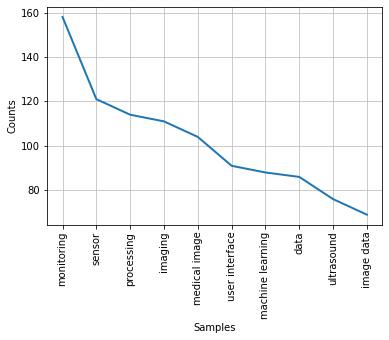

            keyword  count
0        monitoring    158
1            sensor    121
2        processing    114
3           imaging    111
4     medical image    104
5    user interface     91
6  machine learning     88
7              data     86
8        ultrasound     76
9        image data     69


In [106]:
#G16 빈도수 순위

total=[]
for i in keywords:
    for k in i:
        total.append(k[0])
        
freq_dist_nltk = nltk.FreqDist(total)
freq_dist_nltk.plot(10, cumulative=False)
b=pd.DataFrame(freq_dist_nltk.most_common(10), columns=['keyword','count'])
print(b)

In [98]:
#G16 키워드들 다시 KEYBERT
total=[]
for i in keywords:
    for k in i:
        total.append(k[0])
total2=' '.join(total)
model=KeyBERT()
double_keywords=model.extract_keywords(total2, keyphrase_ngram_range=(0,1), stop_words=stop, top_n=20)
double_keywords

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


[('photopiethysmography', 0.3487),
 ('physiological', 0.3466),
 ('photoplethysmography', 0.3419),
 ('photoplethysmogram', 0.3287),
 ('photoplethysmographic', 0.3134),
 ('photoplethysmograph', 0.3121),
 ('physiology', 0.3028),
 ('electroencephalogram', 0.3019),
 ('biometrics', 0.3015),
 ('cardiogram', 0.2986),
 ('ekg', 0.2983),
 ('electrophysiology', 0.2976),
 ('microsensor', 0.2952),
 ('electrophysiological', 0.2942),
 ('electrograms', 0.2796),
 ('electroencephalograms', 0.2795),
 ('electromyography', 0.2779),
 ('biometric', 0.2771),
 ('peripherals', 0.2747),
 ('datasets', 0.2747)]

In [79]:
#한 IPC 해당하는 모든 특허문건들 요약문 합친 뒤 한번에 키워드 추출
doc = result['abstract'].tolist()
total_doc=' '.join(doc)
model=KeyBERT()
keywords=model.extract_keywords(total_doc, keyphrase_ngram_range=(1,2), stop_words=stop, top_n=20)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda


In [34]:
keywords

[('agricultural rolling', 0.6461),
 ('roll agricultural', 0.6053),
 ('wheel agricultural', 0.6048),
 ('wheels agricultural', 0.604),
 ('roller agricultural', 0.5657),
 ('agricultural machine', 0.5639),
 ('tractor agricultural', 0.5598),
 ('propelled agricultural', 0.5539),
 ('agricultural tractor', 0.552),
 ('agricultural tractors', 0.5517),
 ('agricultural machines', 0.5506),
 ('agricultural tool', 0.5499),
 ('tool agricultural', 0.5467),
 ('tractor pivoting', 0.5457),
 ('machine agricultural', 0.5452),
 ('operating agricultural', 0.5417),
 ('lifting agricultural', 0.5392),
 ('laterally agricultural', 0.538),
 ('machinery agricultural', 0.5374),
 ('tractor utilizes', 0.537)]

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
5825it [00:03, 1757.77it/s]


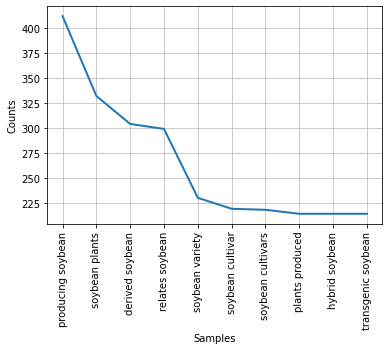

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

207it [00:00, 1710.35it/s]


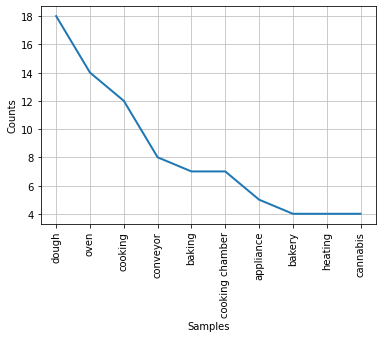

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

150it [00:00, 1785.30it/s]


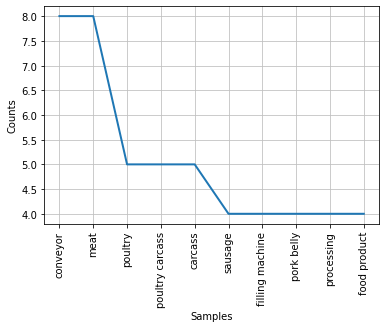

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2123it [00:01, 1862.56it/s]


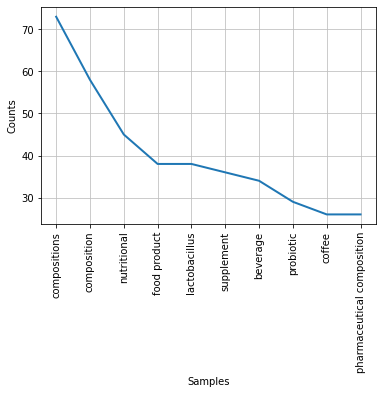

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

858it [00:00, 1836.84it/s]


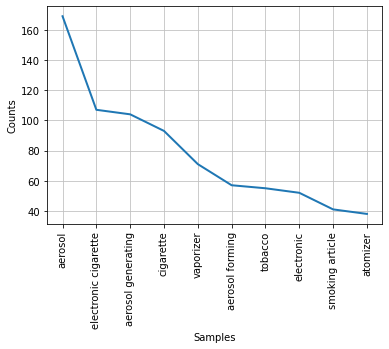

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1035it [00:00, 1837.93it/s]


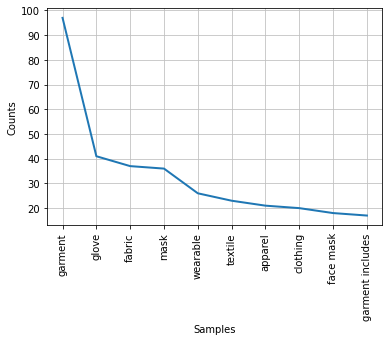

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

355it [00:00, 1848.54it/s]


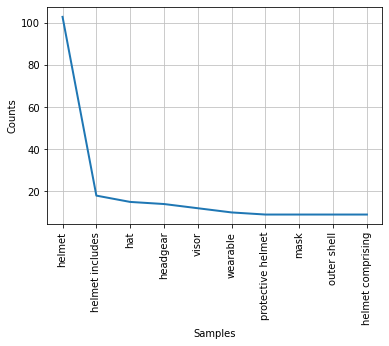

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

766it [00:00, 1895.61it/s]


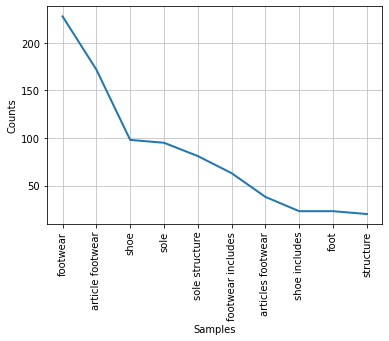

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

516it [00:00, 1875.94it/s]


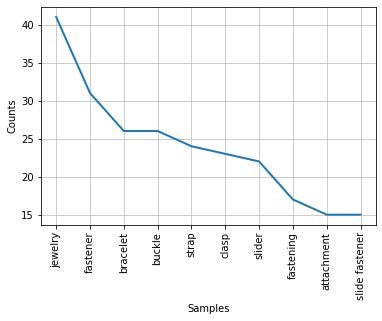

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1567it [00:00, 1840.93it/s]


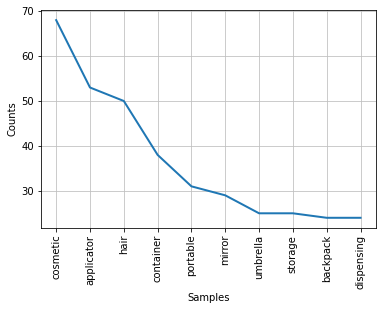

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

454it [00:00, 1845.11it/s]


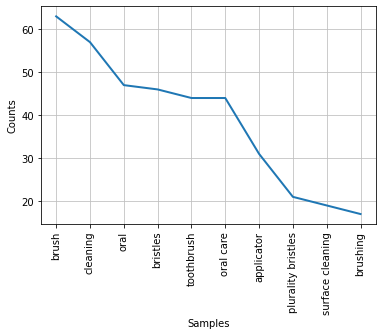

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5463it [00:02, 1827.34it/s]


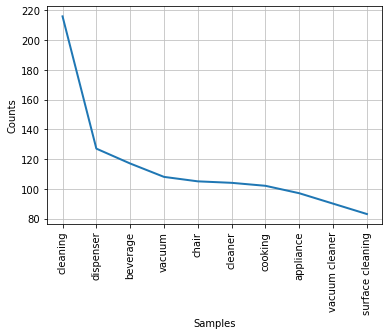

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

41653it [00:22, 1821.44it/s]


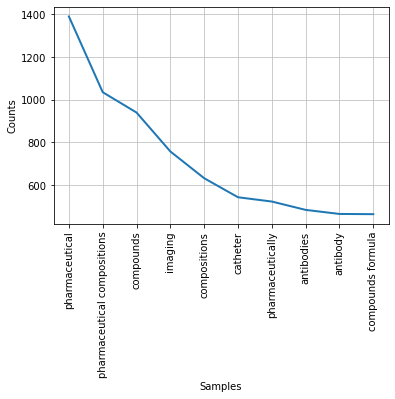

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

729it [00:00, 1773.32it/s]


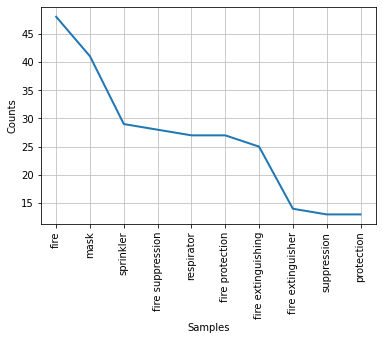

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4741it [00:02, 1789.39it/s]


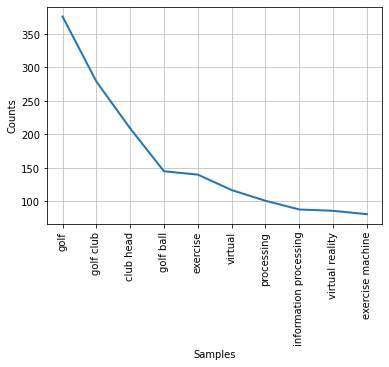

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

8811it [00:04, 1793.07it/s]


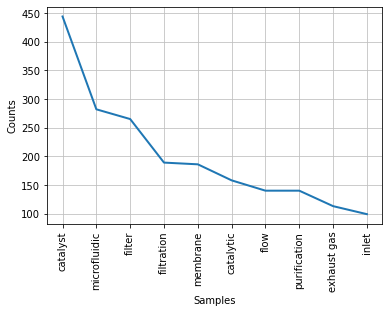

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

326it [00:00, 1800.69it/s]


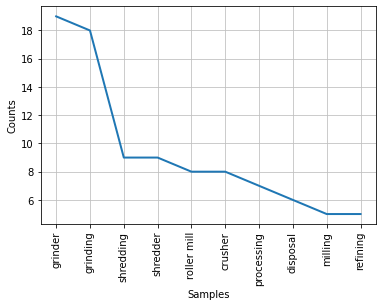

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

316it [00:00, 1815.68it/s]


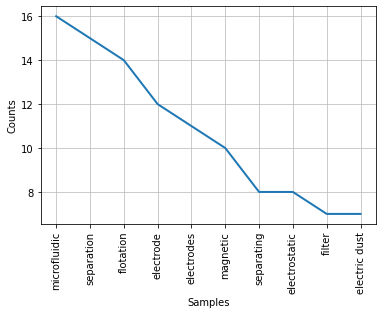

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

253it [00:00, 1781.27it/s]


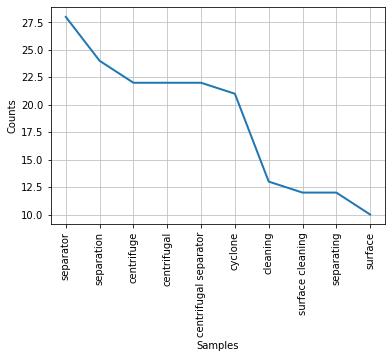

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2394it [00:01, 1615.02it/s]


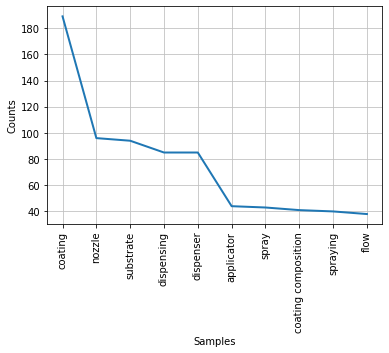

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

341it [00:00, 1794.34it/s]


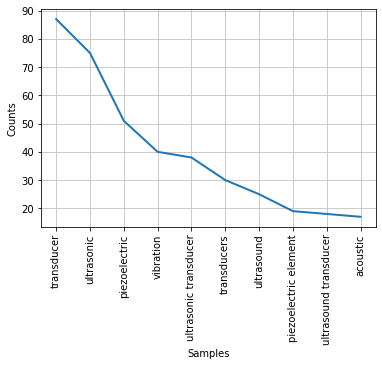

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

359it [00:00, 1768.07it/s]


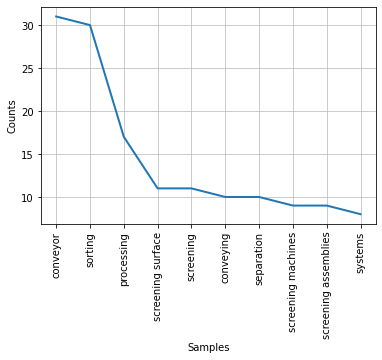

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1022it [00:00, 1821.34it/s]


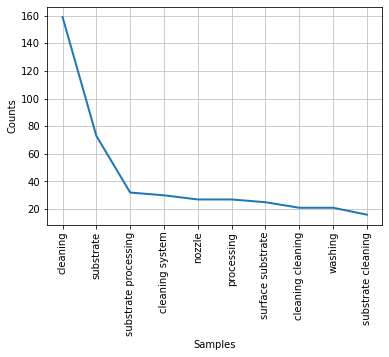

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1298it [00:00, 1813.09it/s]


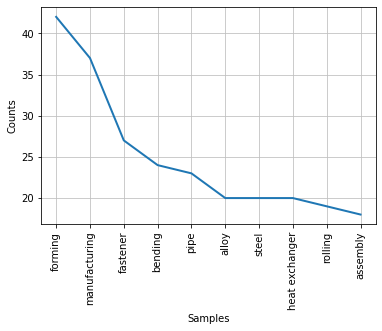

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1927it [00:01, 1791.78it/s]


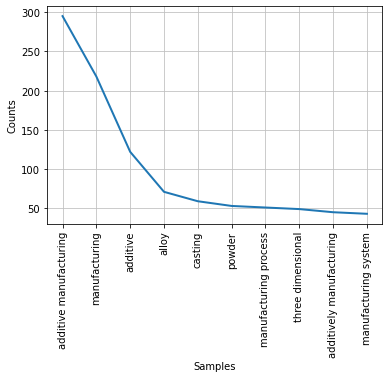

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

3910it [00:02, 1797.90it/s]


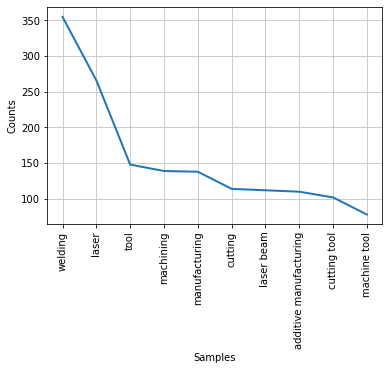

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

648it [00:00, 1799.60it/s]


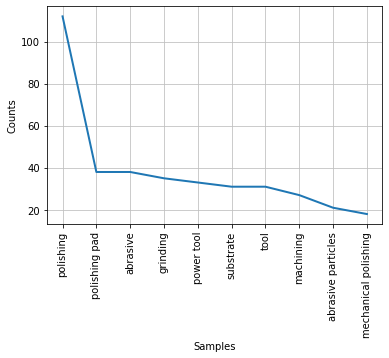

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

3641it [00:02, 1795.39it/s]


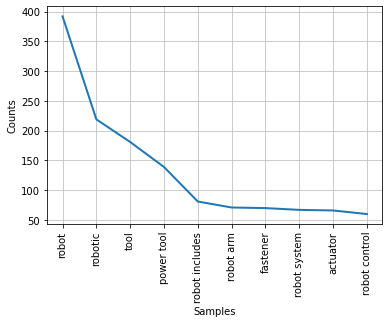

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

752it [00:00, 1833.61it/s]


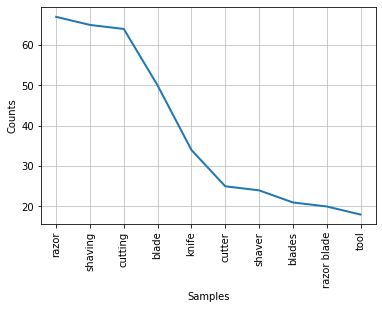

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

385it [00:00, 1832.92it/s]


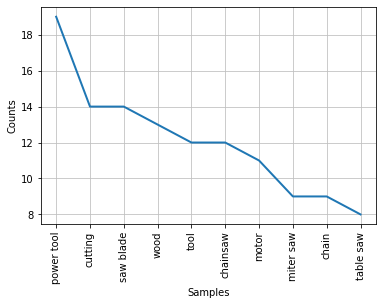

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

532it [00:00, 1815.29it/s]


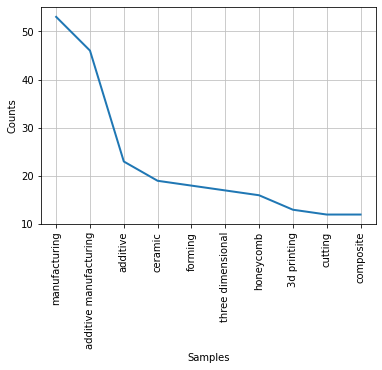

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

6477it [00:03, 1797.39it/s]


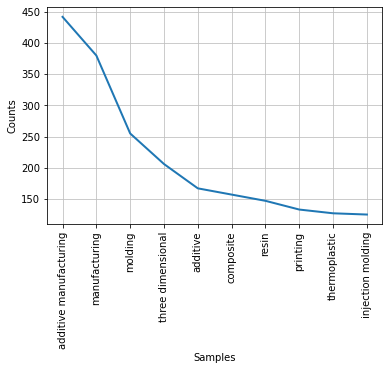

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

228it [00:00, 1780.85it/s]


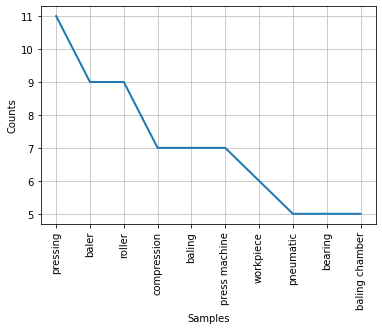

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

381it [00:00, 1788.33it/s]


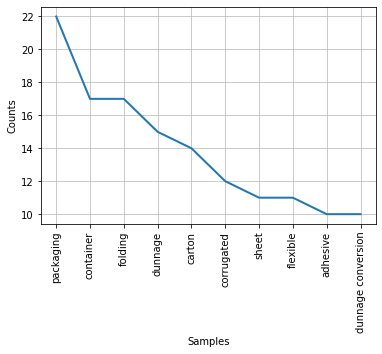

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4015it [00:02, 1840.41it/s]


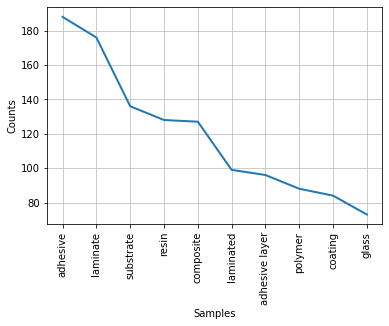

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2529it [00:01, 1814.47it/s]


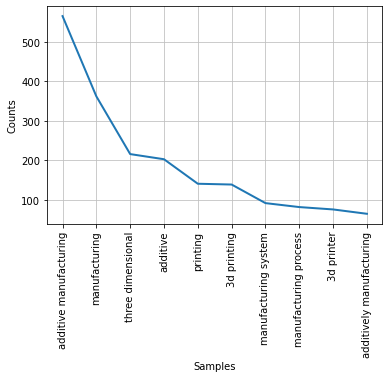

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2839it [00:01, 1846.97it/s]


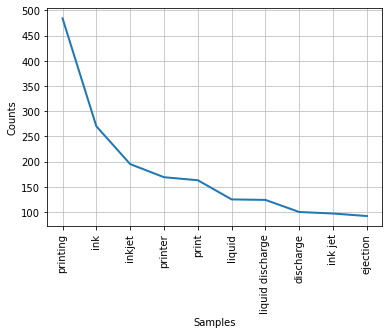

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

358it [00:00, 1835.49it/s]


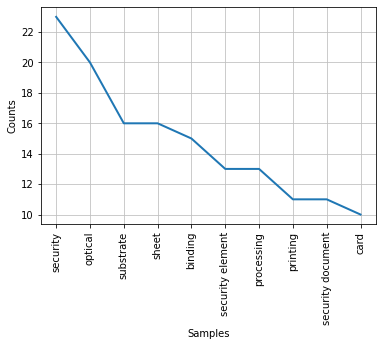

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

147it [00:00, 1814.41it/s]


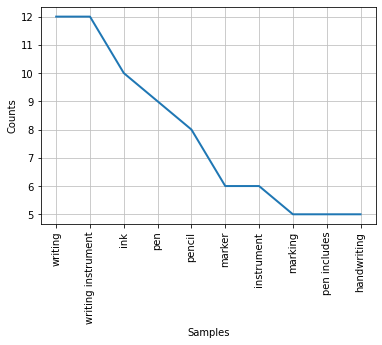

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

339it [00:00, 1841.98it/s]


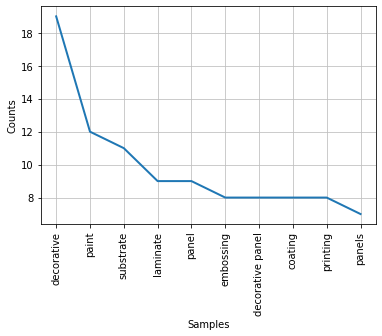

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

17275it [00:09, 1808.32it/s]


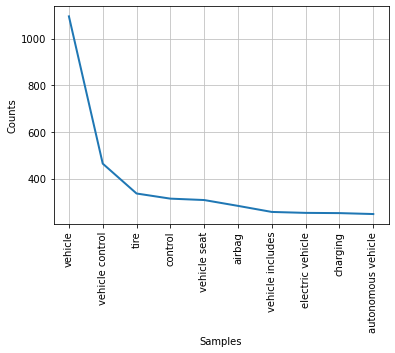

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

654it [00:00, 1811.22it/s]


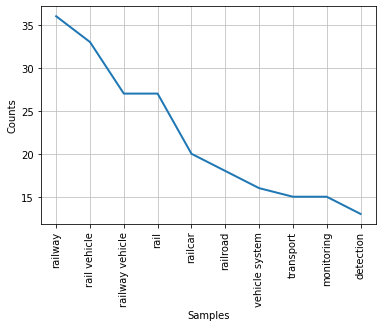

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4216it [00:02, 1817.85it/s]


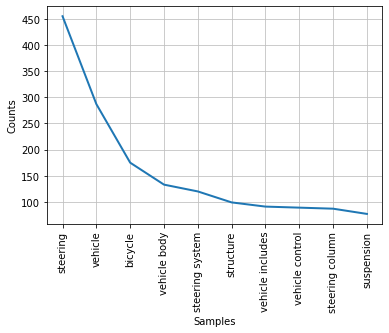

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1187it [00:00, 1798.08it/s]


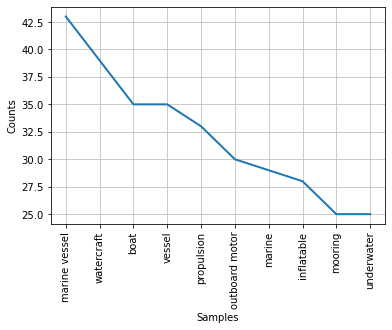

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4550it [00:02, 1817.40it/s]


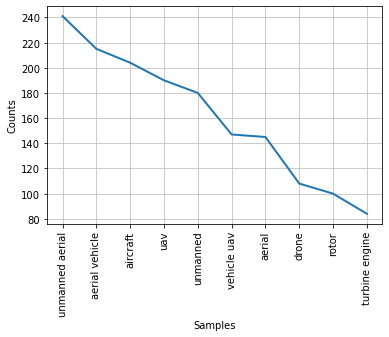

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

7188it [00:04, 1791.36it/s]


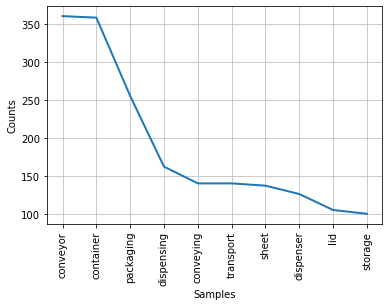

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1249it [00:00, 1814.98it/s]


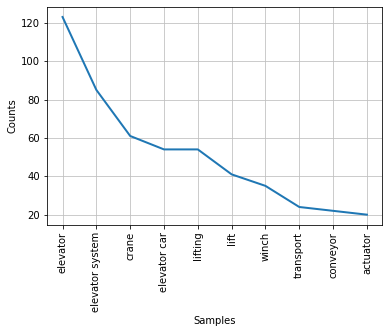

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

741it [00:00, 1789.45it/s]


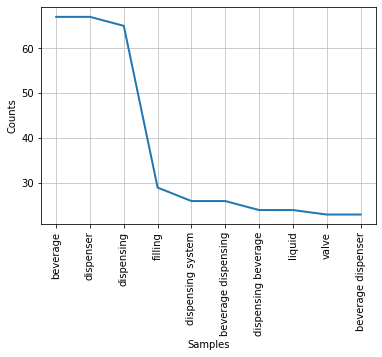

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

681it [00:00, 1870.45it/s]


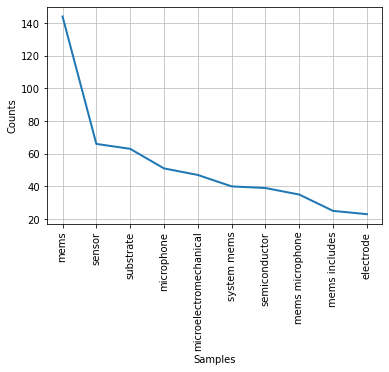

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1699it [00:00, 1844.31it/s]


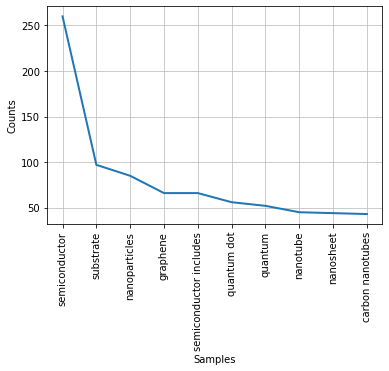

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2395it [00:01, 1825.63it/s]


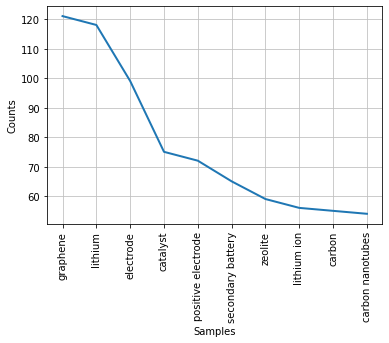

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1626it [00:00, 1795.94it/s]


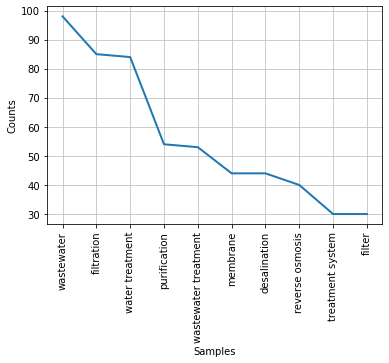

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

966it [00:00, 1815.13it/s]


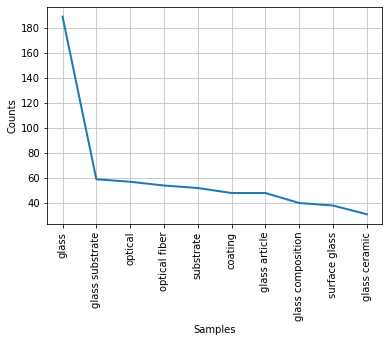

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1249it [00:00, 1862.00it/s]


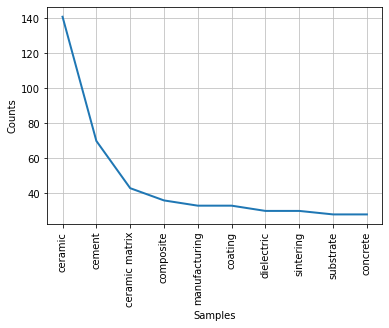

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

244it [00:00, 1834.17it/s]


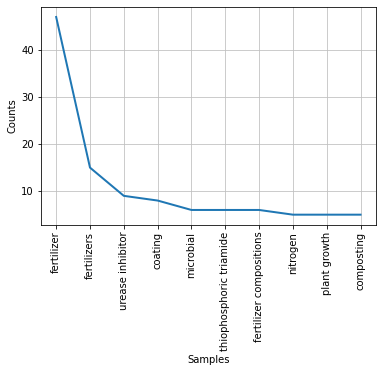

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

76it [00:00, 1899.57it/s]


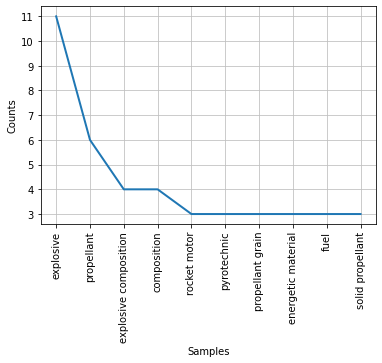

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

12193it [00:06, 1936.75it/s]


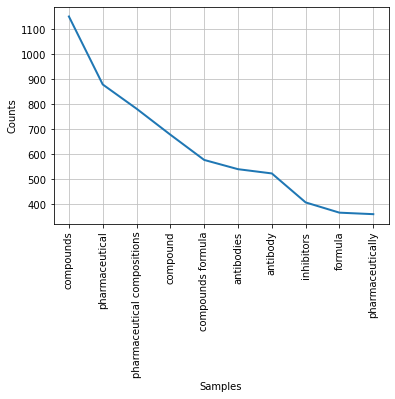

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

7351it [00:03, 1837.93it/s]


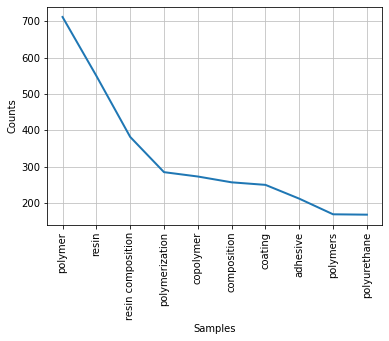

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5959it [00:03, 1848.03it/s]


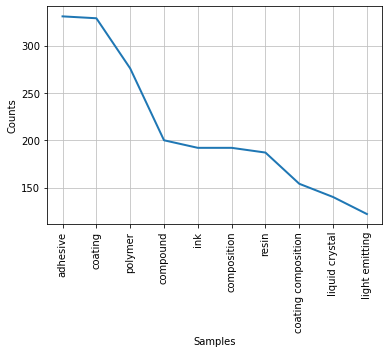

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1638it [00:00, 1835.38it/s]


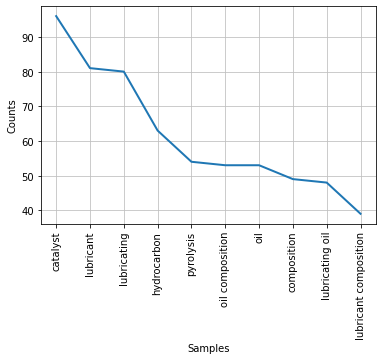

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

864it [00:00, 1905.77it/s]


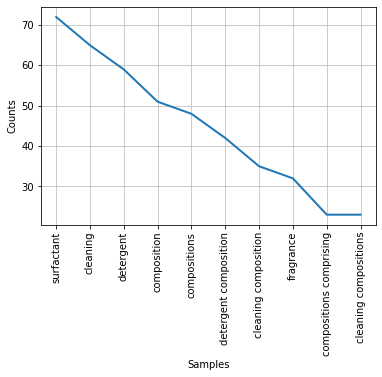

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

8916it [00:04, 1896.01it/s]


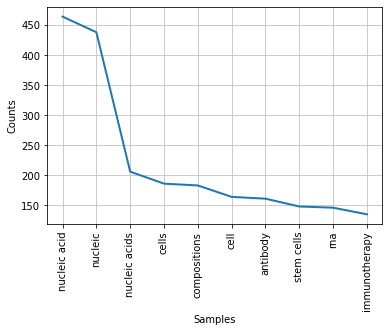

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

68it [00:00, 1888.48it/s]


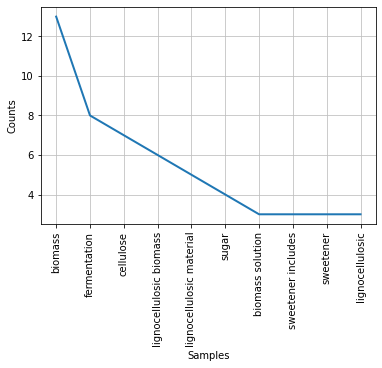

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

710it [00:00, 1738.86it/s]


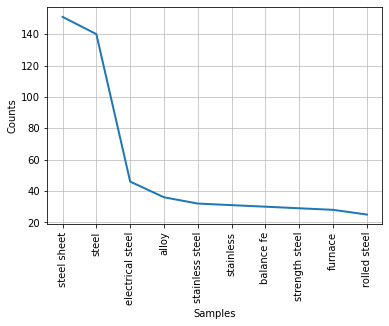

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1727it [00:00, 1760.05it/s]


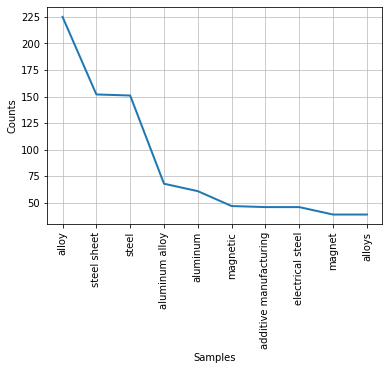

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2737it [00:01, 1797.48it/s]


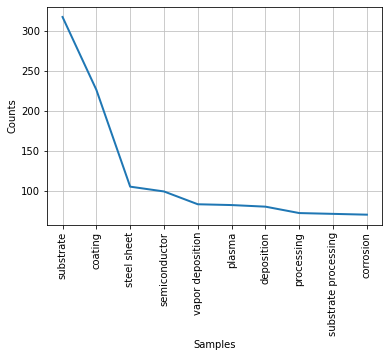

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

967it [00:00, 1800.34it/s]


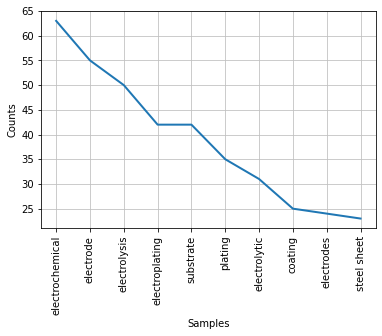

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

444it [00:00, 1823.21it/s]


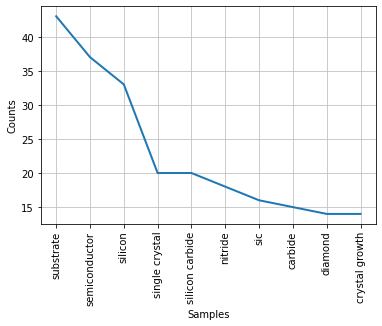

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

216it [00:00, 1945.51it/s]


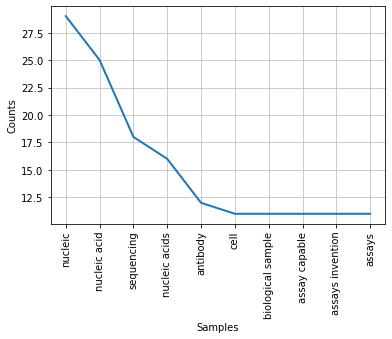

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

529it [00:00, 1823.72it/s]


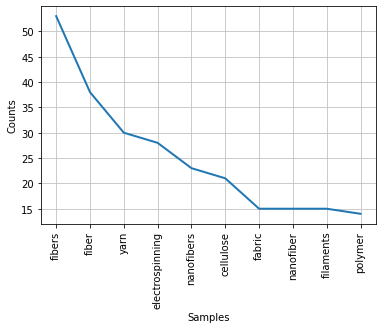

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

574it [00:00, 1782.20it/s]


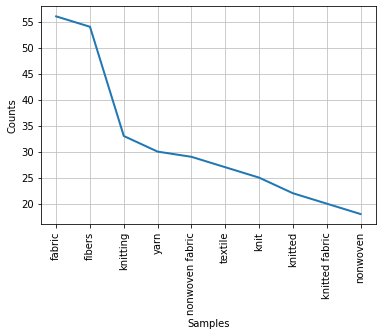

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

156it [00:00, 1772.33it/s]


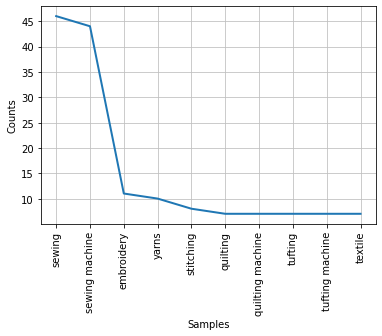

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1112it [00:00, 1745.29it/s]


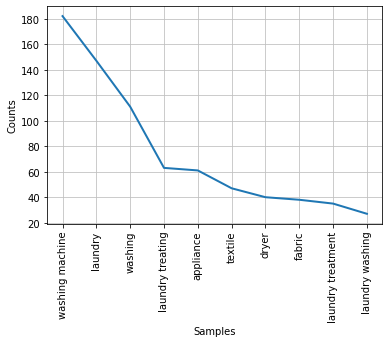

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

76it [00:00, 1767.05it/s]


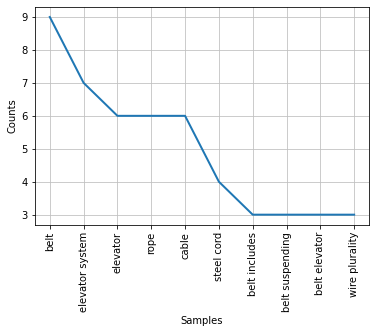

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

582it [00:00, 1768.60it/s]


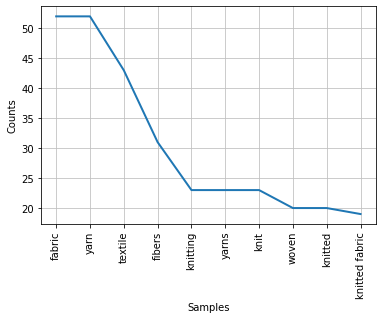

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

580it [00:00, 1812.09it/s]


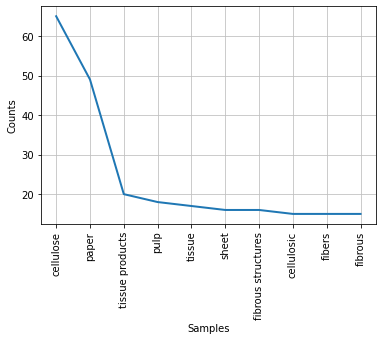

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

773it [00:00, 1798.32it/s]


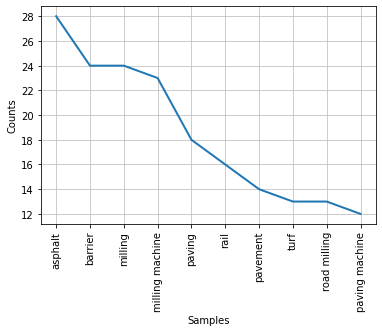

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1260it [00:00, 1744.74it/s]


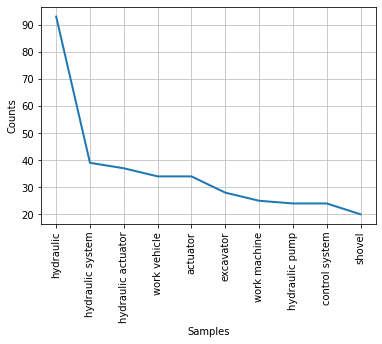

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

849it [00:00, 1371.26it/s]


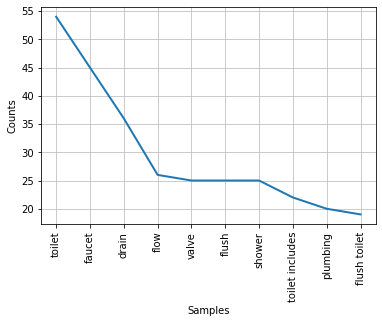

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2640it [00:01, 1757.26it/s]


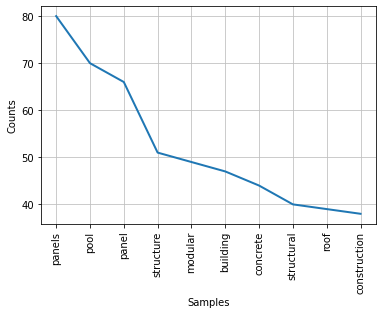

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1716it [00:00, 1773.75it/s]


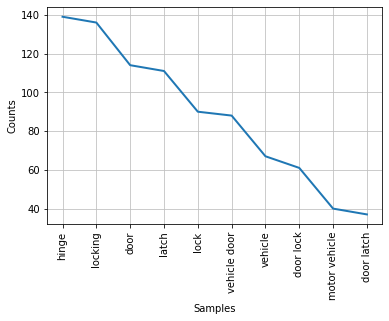

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

955it [00:00, 1751.90it/s]


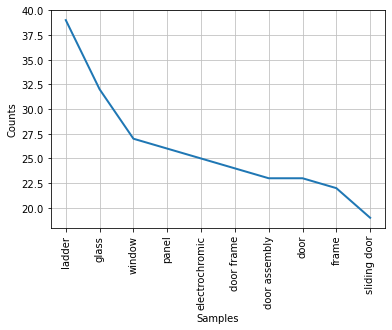

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4283it [00:02, 1706.67it/s]


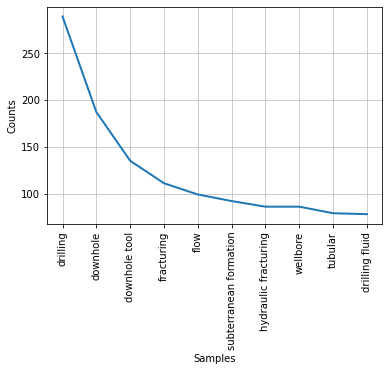

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5098it [00:02, 1758.74it/s]


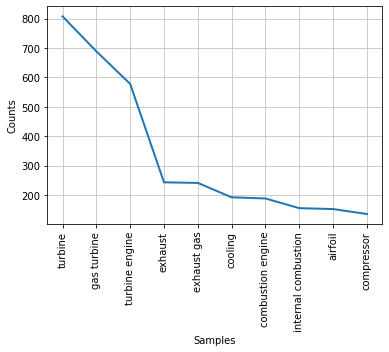

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5293it [00:02, 1789.20it/s]


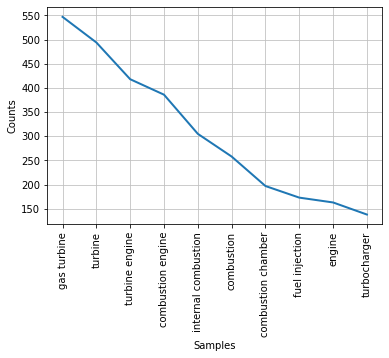

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1261it [00:00, 1767.66it/s]


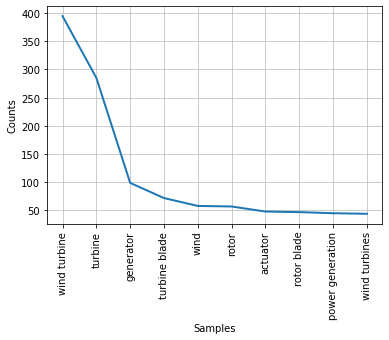

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

3176it [00:01, 1708.07it/s]


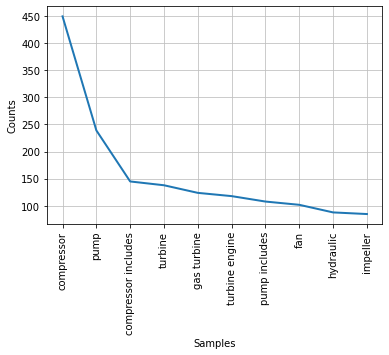

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4193it [00:02, 1647.17it/s]


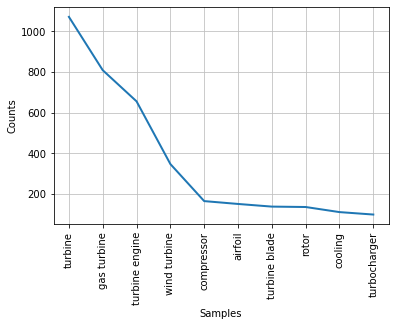

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

901it [00:00, 1735.64it/s]


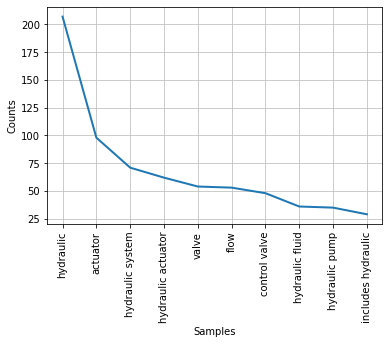

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

12187it [00:07, 1703.38it/s]


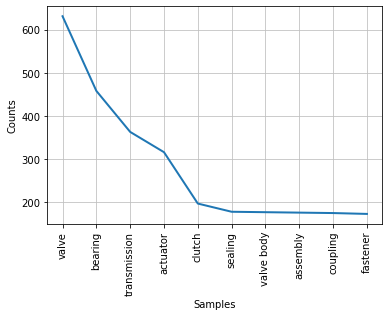

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

505it [00:00, 1777.77it/s]


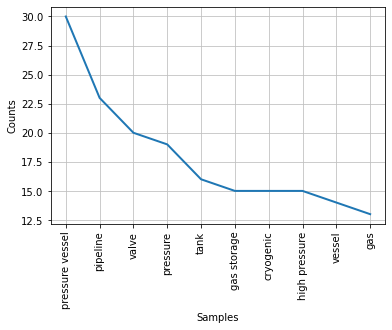

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

3328it [00:02, 1617.53it/s]


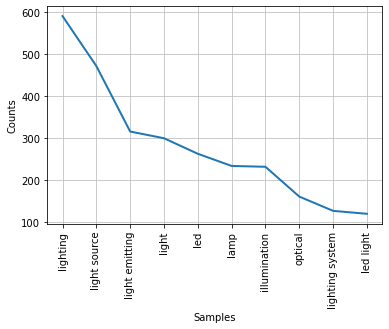

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

191it [00:00, 1578.16it/s]


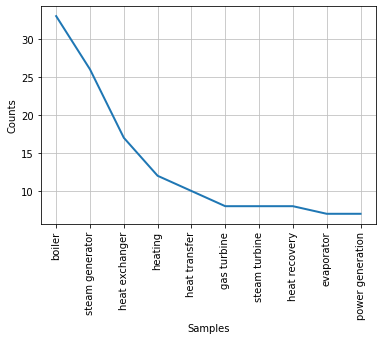

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

915it [00:00, 1724.37it/s]


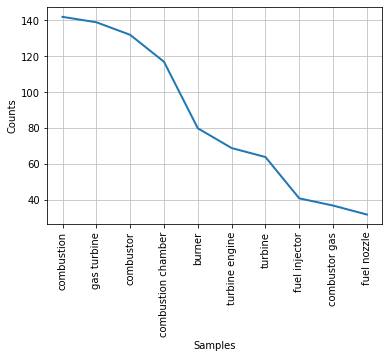

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2689it [00:01, 1676.02it/s]


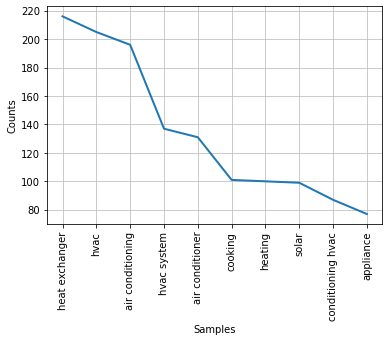

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

2053it [00:01, 1694.90it/s]


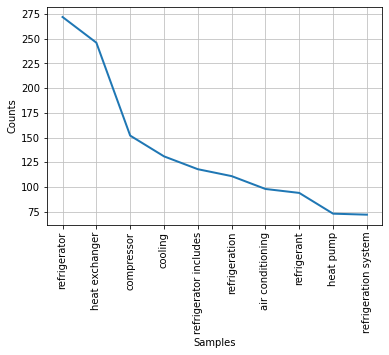

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

293it [00:00, 1743.65it/s]


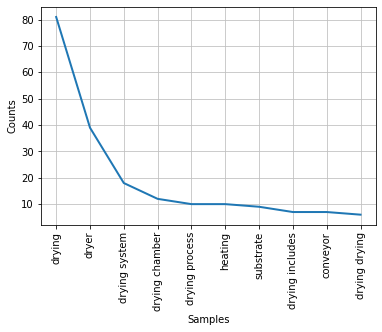

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

241it [00:00, 1771.66it/s]


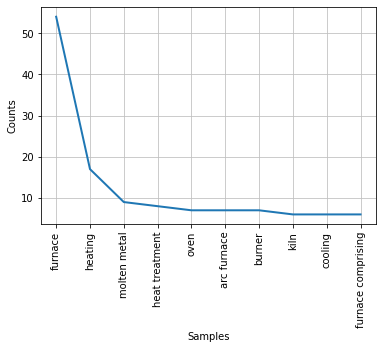

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1399it [00:00, 1672.56it/s]


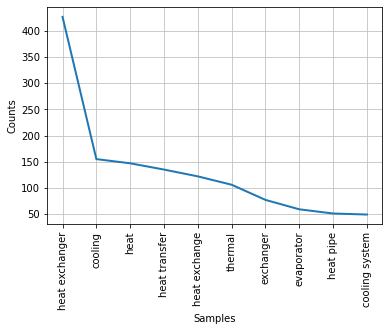

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1409it [00:00, 1760.85it/s]


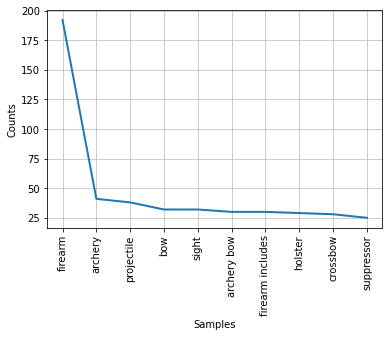

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

560it [00:00, 1771.75it/s]


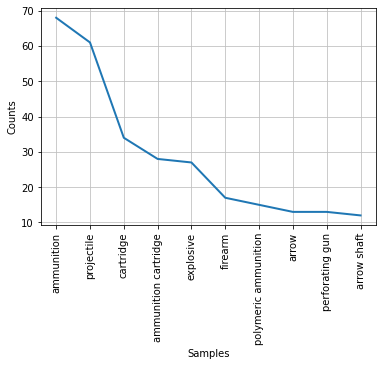

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

31364it [00:19, 1630.70it/s]


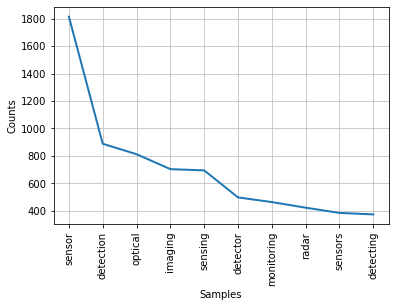

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

14654it [00:08, 1696.02it/s]


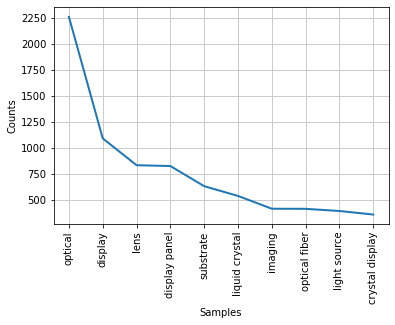

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

6207it [00:03, 1772.50it/s]


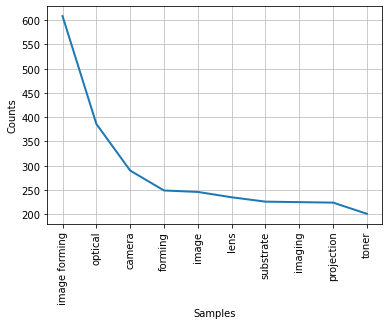

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

534it [00:00, 1771.68it/s]


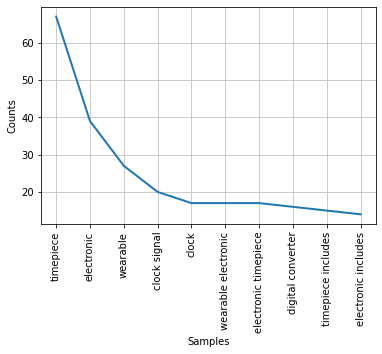

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

9795it [00:05, 1730.17it/s]


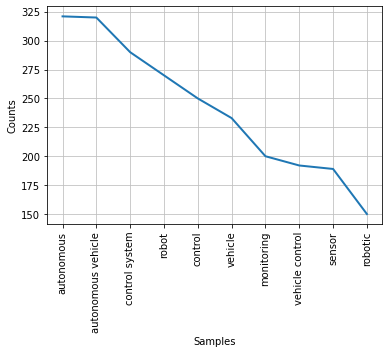

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

83815it [00:51, 1626.13it/s]


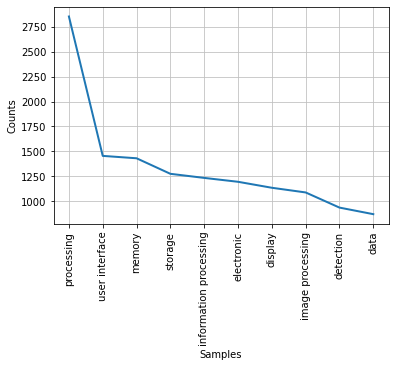

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4532it [00:02, 1700.17it/s]


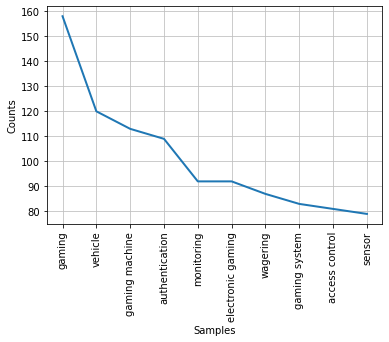

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

6151it [00:03, 1674.27it/s]


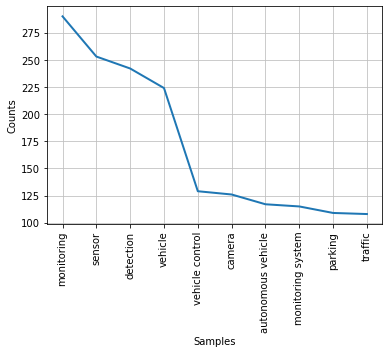

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

8614it [00:04, 1744.17it/s]


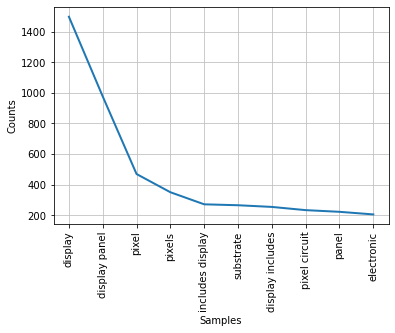

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

4780it [00:02, 1661.07it/s]


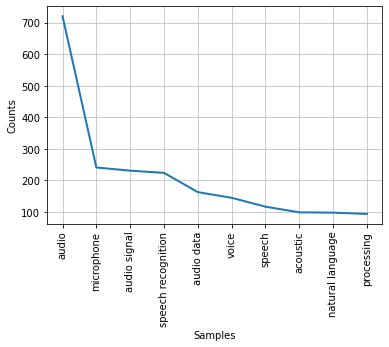

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

6530it [00:03, 1746.06it/s]


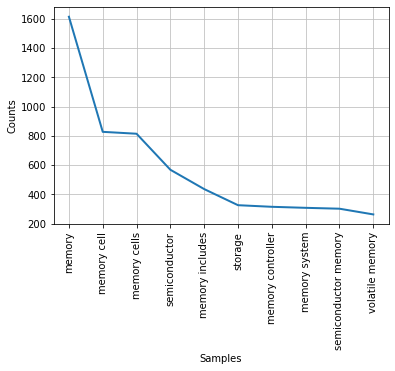

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

5464it [00:03, 1641.45it/s]


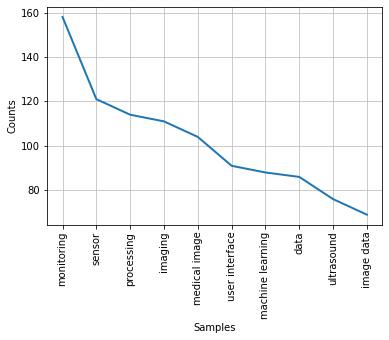

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

636it [00:00, 1713.90it/s]


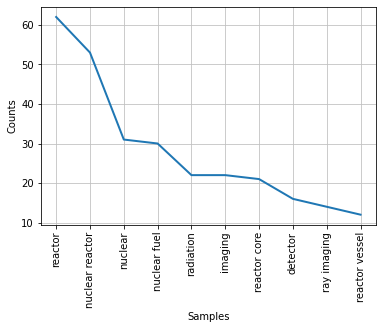

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

43909it [00:24, 1773.43it/s]


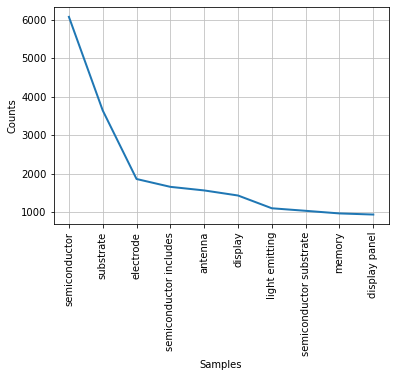

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

13153it [00:07, 1757.77it/s]


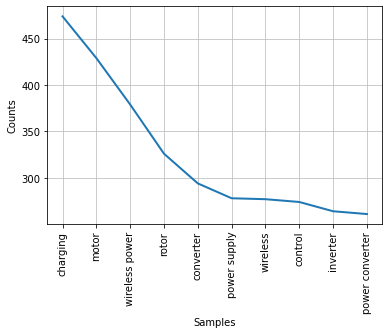

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

7377it [00:04, 1746.46it/s]


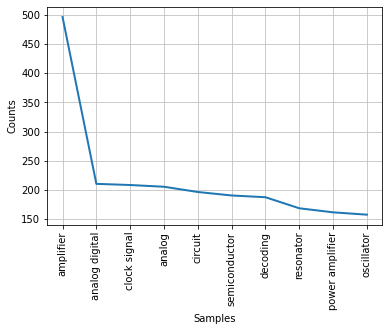

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

70651it [00:41, 1716.25it/s]


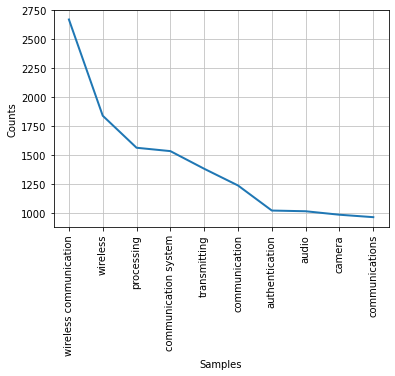

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

9301it [00:05, 1770.62it/s]


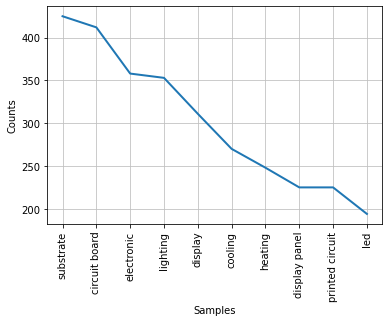

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

28735it [00:18, 1586.16it/s]


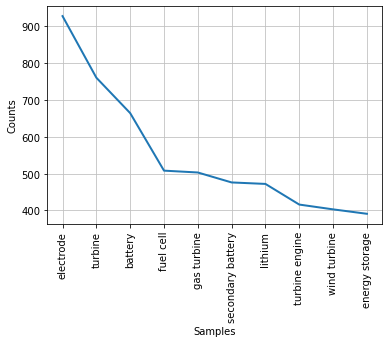

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:sentence_transformers.SentenceTransformer:Use pytorch device: cuda
C:\Users\Beck\anaconda3\envs\2\lib\site-packages\keybert\_model.py:130: UserWarning:

Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!

1220it [00:00, 1563.99it/s]


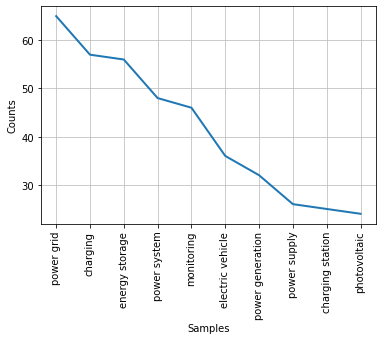

In [112]:
for k in col:
    result = a[a['group_id'].str.contains(k, na=False)]
    doc = result['abstract'].tolist()
    model=KeyBERT()
    keywords=model.extract_keywords(doc, keyphrase_ngram_range=(1,2), stop_words=stop, top_n=10)
    total=[]
    for i in keywords:
        for j in i:
            total.append(j[0])
        
    freq_dist_nltk = nltk.FreqDist(total)
    
    freq_dist_nltk.plot(10, cumulative=False)
    b=pd.DataFrame(freq_dist_nltk.most_common(40), columns=['keyword','count'])
    b.to_csv('{}'.format(k)+'.csv')
    

In [51]:
for h in col:
    key=globals()['{}'.format(h)]
    key=pd.Series(key)
    key.to_csv(h+'.csv')

In [86]:
d.columns[1:20]

Index(['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A42', 'A43', 'A44', 'A45',
       'A46', 'A47', 'A61', 'A62', 'A63', 'A99', 'B01', 'B02', 'B03'],
      dtype='object')

In [52]:
A01

[[('scraper distally', 0.323),
  ('scraper', 0.333),
  ('basket internal', 0.3399),
  ('rotation rolling', 0.366),
  ('rolling', 0.369),
  ('basket rotated', 0.3955),
  ('basket adapted', 0.3998),
  ('rolling basket', 0.4531),
  ('agricultural', 0.5169),
  ('agricultural rolling', 0.5973)],
 [('lifting adjustment', 0.4942),
  ('tractor soil', 0.5106),
  ('tractor continuously', 0.5221),
  ('relative tractor', 0.5284),
  ('linkage tractor', 0.5398),
  ('attached tractor', 0.5539),
  ('tractor vertical', 0.5626),
  ('kp tractor', 0.5638),
  ('tractor position', 0.6042),
  ('tractor adjusting', 0.6317)],
 [('travel agricultural', 0.434),
  ('axle defining', 0.4426),
  ('hitch attachment', 0.4492),
  ('includes axle', 0.4524),
  ('axle mounted', 0.4535),
  ('mounted axle', 0.4591),
  ('axle', 0.464),
  ('hitch oriented', 0.4748),
  ('agricultural', 0.5159),
  ('agricultural machine', 0.6421)],
 [('sensing satellite', 0.4565),
  ('budgeted fertilizer', 0.4617),
  ('fertilizer', 0.465),
  ('

In [22]:
from keybert import KeyBERT
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

stop=stopwords.words('english')
add=['device','devices','methods','method','apparatus', 'implement']
stop.extend(add)

model=KeyBERT()
doc=a.loc[0,'abstract']
keywords=model.extract_keywords(doc, keyphrase_ngram_range=(1,2), stop_words=stop, top_n=10)

keywords

[('agricultural rolling', 0.5973),
 ('agricultural', 0.5169),
 ('rolling basket', 0.4531),
 ('basket adapted', 0.3999),
 ('basket rotated', 0.3955),
 ('rolling', 0.369),
 ('rotation rolling', 0.3659),
 ('basket internal', 0.34),
 ('scraper', 0.3329),
 ('scraper distally', 0.3229)]